In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Fixed Data**

In [ ]:
data_fixed = pd.read_csv('/content/drive/MyDrive/Emotion Recognition/Dataset/Fixed Text Typing Dataset.csv', sep=';',low_memory=False,dtype=str)

In [ ]:
data_fixed

userId emotionIndex  index keyCode           keyDown             keyUp  \
0        100            N   3448       o  1580000000000,00  1580000000000,00   
1        100            N   3449       n  1580000000000,00  1580000000000,00   
2        100            N   3450       c  1580000000000,00  1580000000000,00   
3        100            N   3451       e  1580000000000,00  1580000000000,00   
4        100            N   3452          1580000000000,00  1580000000000,00   
...      ...          ...    ...     ...               ...               ...   
46866     72            N  50314       t  1580000000000,00  1580000000000,00   
46867     72            N  50315       h  1580000000000,00  1580000000000,00   
46868     72            N  50316       e  1580000000000,00  1580000000000,00   
46869     72            N  50317       r  1580000000000,00  1580000000000,00   
46870     72            N  50318       n  1580000000000,00  1580000000000,00   

         D1U1     D1U2     D1D2     U1D2     U1U2     D1U3     D1D3 answer  
0       90,00  2556,00  2479,00  2389,00  2466,00  2737,00  2610,00    NaN  
1       77,00   258,00   131,00    54,00   181,00   744,00   650,00    NaN  
2      127,00   613,00   519,00   392,00   486,00   795,00   719,00    NaN  
3       94,00   276,00   200,00   106,00   182,00  2304,00  2232,00    NaN  
4       76,00  2104,00  2032,00  1956,00  2028,00  2271,00  2191,00    NaN  
...       ...      ...      ...      ...      ...      ...      ...    ...  
46866   57,00   211,00   138,00    81,00   154,00   376,00   286,00    NaN  
46867   73,00   238,00   148,00    75,00   165,00   461,00   342,00    NaN  
46868   90,00   313,00   194,00   104,00   223,00   655,00   530,00    NaN  
46869  119,00   461,00   336,00   217,00   342,00      NaN      NaN    NaN  
46870  125,00      NaN      NaN      NaN      NaN      NaN      NaN    NaN  

[46871 rows x 14 columns]

In [ ]:
data_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46871 entries, 0 to 46870
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   userId        46871 non-null  object
 1   emotionIndex  46871 non-null  object
 2   index         46871 non-null  object
 3   keyCode       46846 non-null  object
 4   keyDown       46846 non-null  object
 5   keyUp         45558 non-null  object
 6   D1U1          46846 non-null  object
 7   D1U2          46606 non-null  object
 8   D1D2          46606 non-null  object
 9   U1D2          46606 non-null  object
 10  U1U2          46606 non-null  object
 11  D1U3          46364 non-null  object
 12  D1D3          46364 non-null  object
 13  answer        18781 non-null  object
dtypes: object(14)
memory usage: 5.0+ MB


# **Explorer data**

In [ ]:
for col in ['keyDown', 'keyUp','userId']:
    data_fixed[col] = data_fixed[col].astype(str).str.replace(',', '.').astype(float)

In [ ]:
for col in ['D1U1','D1U2','U1D2','U1U2','D1U3','D1D2','D1D3']:
    data_fixed[col] = data_fixed[col].astype(str).str.replace(',', '.').astype(float)

In [ ]:
data_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46871 entries, 0 to 46870
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   userId        46871 non-null  float64
 1   emotionIndex  46871 non-null  object 
 2   index         46871 non-null  object 
 3   keyCode       46846 non-null  object 
 4   keyDown       46846 non-null  float64
 5   keyUp         45558 non-null  float64
 6   D1U1          46846 non-null  float64
 7   D1U2          46606 non-null  float64
 8   D1D2          46606 non-null  float64
 9   U1D2          46606 non-null  float64
 10  U1U2          46606 non-null  float64
 11  D1U3          46364 non-null  float64
 12  D1D3          46364 non-null  float64
 13  answer        18781 non-null  object 
dtypes: float64(10), object(4)
memory usage: 5.0+ MB


In [ ]:
data_fixed.describe()

userId       keyDown         keyUp          D1U1          D1U2  \
count  46871.000000  4.684600e+04  4.555800e+04  4.684600e+04  4.660600e+04   
mean     101.721875  1.580000e+12  1.580000e+12 -4.344106e+10 -4.335965e+10   
std       37.736388  0.000000e+00  0.000000e+00  2.583625e+11  2.581271e+11   
min       13.000000  1.580000e+12  1.580000e+12 -1.580000e+12 -1.580000e+12   
25%       73.000000  1.580000e+12  1.580000e+12  7.000000e+01  2.510000e+02   
50%      104.000000  1.580000e+12  1.580000e+12  9.200000e+01  3.320000e+02   
75%      130.000000  1.580000e+12  1.580000e+12  1.200000e+02  4.990000e+02   
max      193.000000  1.580000e+12  1.580000e+12  3.828000e+03  4.616100e+05   

                D1D2          U1D2          U1U2          D1U3           D1D3  
count   46606.000000  4.660600e+04  4.660600e+04  4.636400e+04   46364.000000  
mean      439.116981  4.366476e+10  3.051114e+08 -4.321111e+10     877.612609  
std      3403.924378  2.590080e+11  1.078125e+11  2.576971e+11    4932.252363  
min         1.000000 -3.439000e+03 -1.580000e+12 -1.580000e+12       4.000000  
25%       157.000000  6.700000e+01  1.530000e+02  4.570000e+02     366.000000  
50%       232.000000  1.460000e+02  2.330000e+02  6.310000e+02     531.000000  
75%       396.000000  3.300000e+02  3.990000e+02  9.600000e+02     860.000000  
max    461478.000000  1.580000e+12  1.580000e+12  4.636900e+05  463588.000000

**Analyse**


*   KeyDown,KeyUp => all the columns have just one value  1.58 e +12 , std=0 : no diversity
*   D1D2,D1D3=> std , mean => same range / large gap = there is outlires
*   D1U1,D1U2,D1U3=>mean: same range , negative mean /std :same range and big std there is a larg ecart between values diversity of columns values /it contains outliers  
*   U1D2,U1U2=>std: very big diversity , contain negative values ,larg gap betwenn 75% quartile and the max value : outlires





In [ ]:
data_fixed['userId'].nunique()

83

In [ ]:
data_fixed['keyCode'].nunique()

57

In [ ]:
data_fixed['keyCode'].unique()

array(['o', 'n', 'c', 'e', ' ', 't', 'h', 'r', 'w', 'a', 's', 'd', 'm',
       'u', '¾', '\\b', '\\u0010', 'l', 'y', '¼', 'i', 'f', 'b', '»', 'k',
       'v', 'g', '&', "'", '\\u0014', '%', 'p', 'j', 'x', '5', '\\r', 'z',
       '\\u0011', '.', '®', '(', 'q', '¿', ']', nan, 'â', '½', '`', 'å',
       '\\u001b', 'à', '\\t', '[', '\\u0012', 'ý', 'ü', '\x90', '\\u0000'],
      dtype=object)

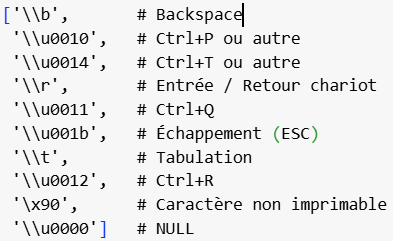

In [ ]:
data_fixed['emotionIndex'].nunique()

5

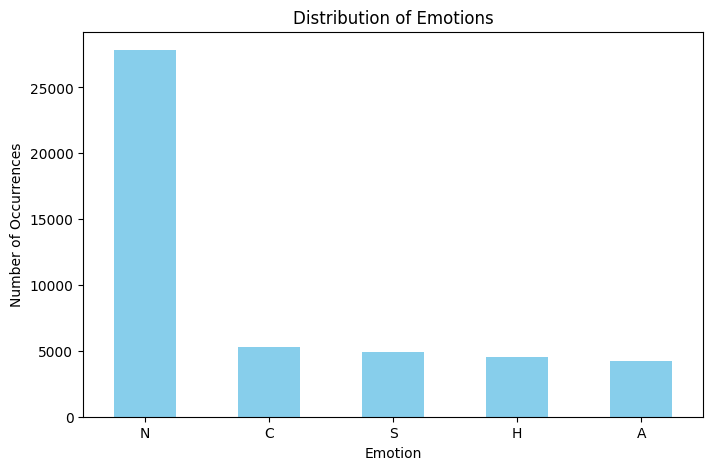

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences of each emotion
counts = data_fixed['emotionIndex'].value_counts()

# Plot as histogram / bar plot
plt.figure(figsize=(8,5))
counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Emotions")
plt.xlabel("Emotion")
plt.ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()


In [ ]:
data_fixed['emotionIndex'].value_counts()

emotionIndex
N    27841
C     5313
S     4880
H     4569
A     4268
Name: count, dtype: int64

In [ ]:
data_fixed['answer'].nunique()

2

In [ ]:
data_fixed.isnull().sum()

userId              0
emotionIndex        0
index               0
keyCode            25
keyDown            25
keyUp            1313
D1U1               25
D1U2              265
D1D2              265
U1D2              265
U1U2              265
D1U3              507
D1D3              507
answer          28090
dtype: int64

**Analyse Relation entre les colonnes**

In [ ]:
df=data_fixed[data_fixed['userId']==100]

In [ ]:
df_subset = df.loc[0:282]

In [ ]:
dH = df.loc[283:422]

In [ ]:
df_subset

userId emotionIndex index keyCode       keyDown         keyUp   D1U1  \
0     100.0            N  3448       o  1.580000e+12  1.580000e+12   90.0   
1     100.0            N  3449       n  1.580000e+12  1.580000e+12   77.0   
2     100.0            N  3450       c  1.580000e+12  1.580000e+12  127.0   
3     100.0            N  3451       e  1.580000e+12  1.580000e+12   94.0   
4     100.0            N  3452          1.580000e+12  1.580000e+12   76.0   
..      ...          ...   ...     ...           ...           ...    ...   
278   100.0            N  3726       u  1.580000e+12  1.580000e+12   81.0   
279   100.0            N  3727  \u0014  1.580000e+12  1.580000e+12   86.0   
280   100.0            N  3728  \u0014  1.580000e+12  1.580000e+12  121.0   
281   100.0            N  3729       o  1.580000e+12  1.580000e+12   88.0   
282   100.0            N  3730  \u0014  1.580000e+12  1.580000e+12  139.0   

       D1U2    D1D2    U1D2    U1U2    D1U3    D1D3 answer  
0    2556.0  2479.0  2389.0  2466.0  2737.0  2610.0    NaN  
1     258.0   131.0    54.0   181.0   744.0   650.0    NaN  
2     613.0   519.0   392.0   486.0   795.0   719.0    NaN  
3     276.0   200.0   106.0   182.0  2304.0  2232.0    NaN  
4    2104.0  2032.0  1956.0  2028.0  2271.0  2191.0    NaN  
..      ...     ...     ...     ...     ...     ...    ...  
278   345.0   259.0   178.0   264.0  8619.0  8498.0    NaN  
279  8360.0  8239.0  8153.0  8274.0  8649.0  8561.0    NaN  
280   410.0   322.0   201.0   289.0  1441.0  1302.0    NaN  
281  1119.0   980.0   892.0  1031.0     NaN     NaN    NaN  
282     NaN     NaN     NaN     NaN     NaN     NaN    NaN  

[283 rows x 14 columns]

In [ ]:
1.580000e+12

1580000000000.0

In [ ]:
da=df[df['emotionIndex']=='A']

In [ ]:
da

userId emotionIndex  index keyCode       keyDown         keyUp   D1U1  \
34182   100.0            A  37630       j  1.580000e+12  1.580000e+12   75.0   
34183   100.0            A  37631       a  1.580000e+12  1.580000e+12  118.0   
34184   100.0            A  37632       k  1.580000e+12  1.580000e+12   79.0   
34185   100.0            A  37633       e  1.580000e+12  1.580000e+12  103.0   
34186   100.0            A  37634          1.580000e+12  1.580000e+12   94.0   
...       ...          ...    ...     ...           ...           ...    ...   
34358   100.0            A  37806       i  1.580000e+12  1.580000e+12   72.0   
34359   100.0            A  37807       f  1.580000e+12  1.580000e+12   99.0   
34360   100.0            A  37808       e  1.580000e+12  1.580000e+12  120.0   
34361   100.0            A  37809  \u0010  1.580000e+12  1.580000e+12  351.0   
34362   100.0            A  37810       ¾  1.580000e+12  1.580000e+12 -107.0   

         D1U2    D1D2    U1D2    U1U2    D1U3    D1D3 answer  
34182   324.0   206.0   131.0   249.0   768.0   689.0      R  
34183   562.0   483.0   365.0   444.0   969.0   866.0      R  
34184   486.0   383.0   304.0   407.0   937.0   843.0      R  
34185   554.0   460.0   357.0   451.0  2352.0  2277.0      R  
34186  1892.0  1817.0  1723.0  1798.0  2050.0  1982.0      R  
...       ...     ...     ...     ...     ...     ...    ...  
34358   549.0   450.0   378.0   477.0   715.0   595.0      R  
34359   265.0   145.0    46.0   166.0  1282.0   931.0      R  
34360  1137.0   786.0   666.0  1017.0  1177.0  1070.0      R  
34361   391.0   284.0   -67.0    40.0     NaN     NaN    NaN  
34362     NaN     NaN     NaN     NaN     NaN     NaN    NaN  

[181 rows x 14 columns]

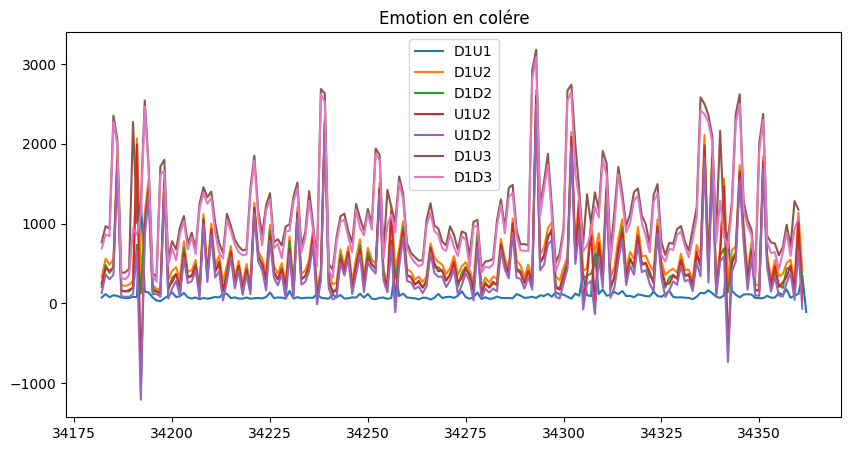

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Tracer la colonne 'TotTime'
plt.figure(figsize=(10,5))
plt.plot(da['D1U1'], label='D1U1')
plt.plot(da['D1U2'], label='D1U2')
plt.plot(da['D1D2'], label='D1D2')
plt.plot(da['U1U2'], label='U1U2')
plt.plot(da['U1D2'], label='U1D2')
plt.plot(da['D1U3'], label='D1U3')
plt.plot(da['D1D3'], label='D1D3')
plt.title('Emotion en colére')
plt.legend()
plt.show()


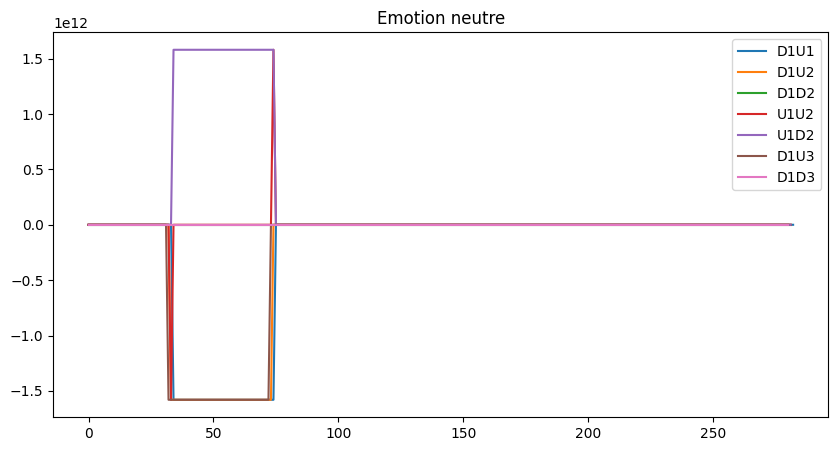

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sélectionner les lignes de 0 à 282
df_subset = df.loc[0:282]

# Tracer plusieurs colonnes
plt.figure(figsize=(10,5))

plt.plot(df_subset['D1U1'], label='D1U1')
plt.plot(df_subset['D1U2'], label='D1U2')
plt.plot(df_subset['D1D2'], label='D1D2')
plt.plot(df_subset['U1U2'], label='U1U2')
plt.plot(df_subset['U1D2'], label='U1D2')
plt.plot(df_subset['D1U3'], label='D1U3')
plt.plot(df_subset['D1D3'], label='D1D3')
plt.title('Emotion neutre')

# Personnalisation
plt.legend()


# Affichage
plt.show()

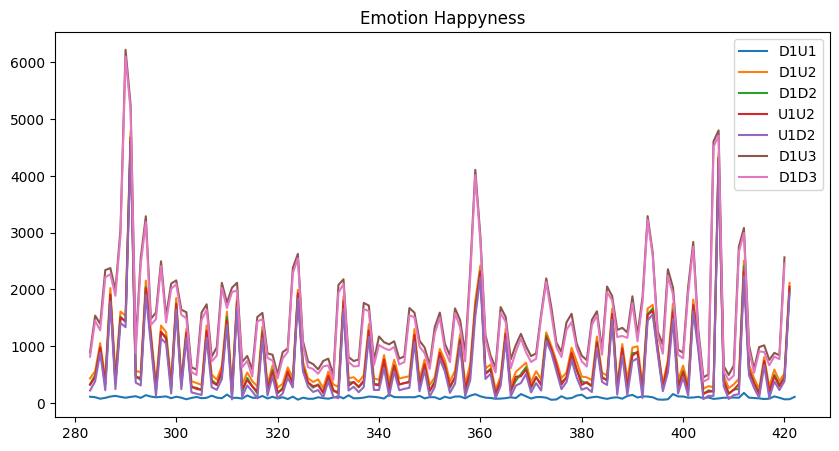

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(dH['D1U1'], label='D1U1')
plt.plot(dH['D1U2'], label='D1U2')
plt.plot(dH['D1D2'], label='D1D2')
plt.plot(dH['U1U2'], label='U1U2')
plt.plot(dH['U1D2'], label='U1D2')
plt.plot(dH['D1U3'], label='D1U3')
plt.plot(dH['D1D3'], label='D1D3')
plt.title('Emotion Happyness')
plt.legend()
plt.show()


**Distribution des colonnes**

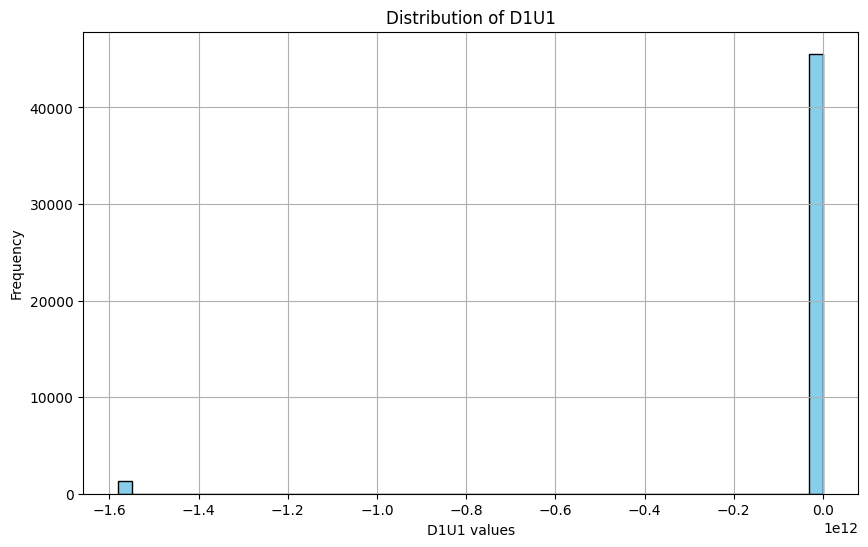

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(data_fixed['D1U1'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of D1U1")
plt.xlabel("D1U1 values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

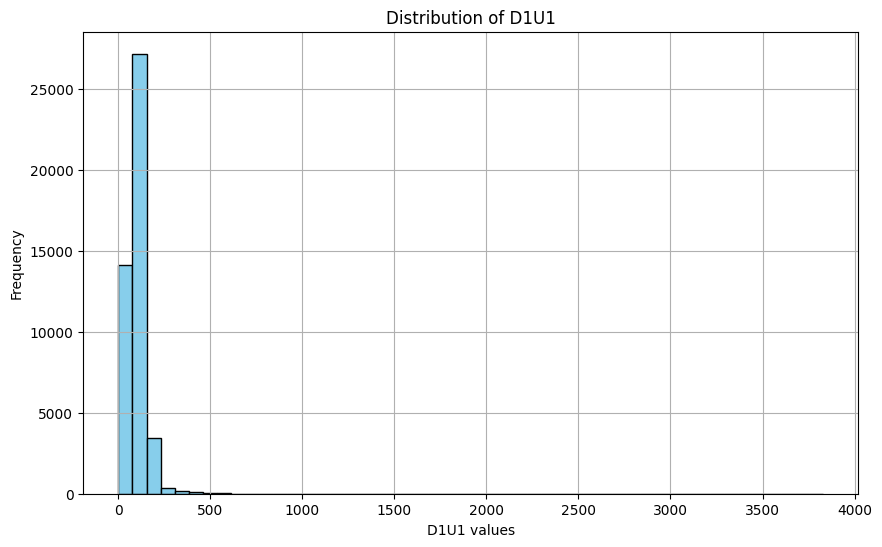

In [ ]:
import matplotlib.pyplot as plt
dfil=data_fixed[data_fixed['D1U1']>0]
plt.figure(figsize=(10,6))
plt.hist(dfil['D1U1'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of D1U1")
plt.xlabel("D1U1 values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

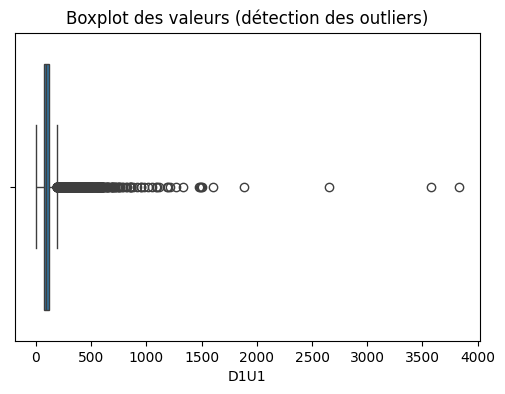

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=dfil['D1U1'])
plt.title("Boxplot des valeurs (détection des outliers)")
plt.show()

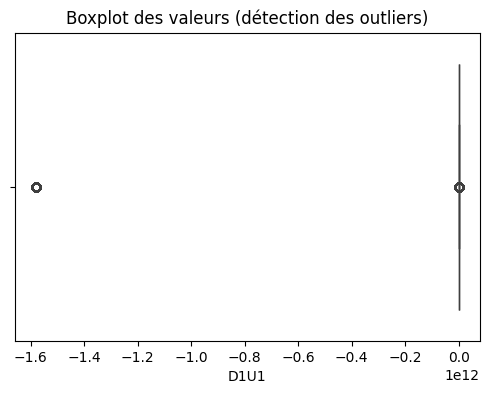

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data_fixed['D1U1'])
plt.title("Boxplot des valeurs (détection des outliers)")
plt.show()

In [ ]:
Q1 = data_fixed['D1U1'].quantile(0.25)
Q3 = data_fixed['D1U1'].quantile(0.75)
IQR = Q3 - Q1

borne_min = Q1 - 1.5 * IQR
borne_max = Q3 + 1.5 * IQR

outliers_iqr = data_fixed[(data_fixed['D1U1'] < borne_min) | (data_fixed['D1U1'] > borne_max)]

df_outliers =pd.DataFrame(outliers_iqr)

In [ ]:
df_outliers['D1U1']

34      -1.580000e+12
35      -1.580000e+12
36      -1.580000e+12
37      -1.580000e+12
38      -1.580000e+12
             ...     
46752    5.710000e+02
46786    2.350000e+02
46811    3.010000e+02
46845    2.500000e+02
46848    1.980000e+02
Name: D1U1, Length: 2722, dtype: float64

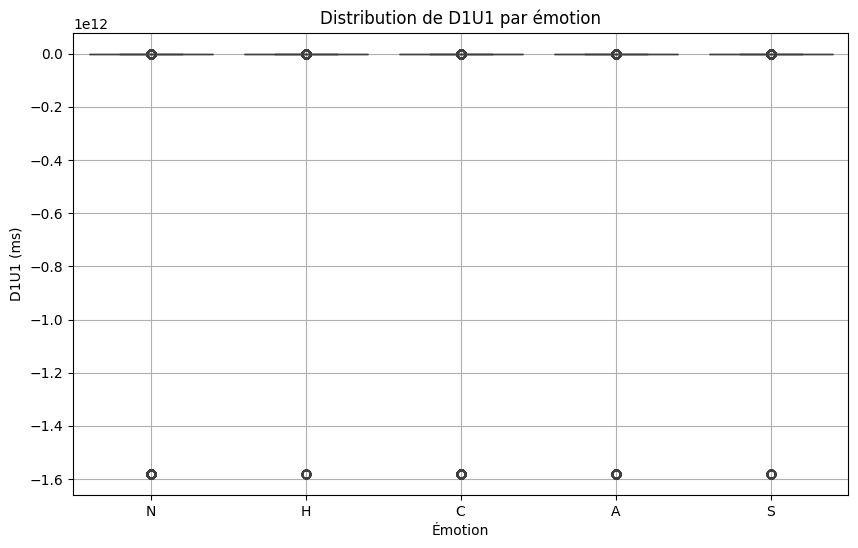

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_fixed, x='emotionIndex', y='D1U1')
plt.title("Distribution de D1U1 par émotion")
plt.xlabel("Émotion")
plt.ylabel("D1U1 (ms)")
plt.grid(True)
plt.show()


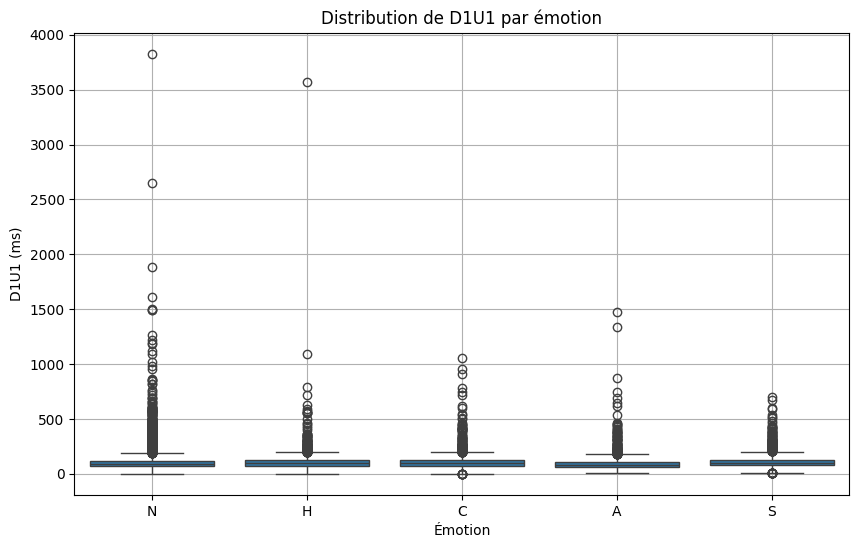

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=dfil, x='emotionIndex', y='D1U1')
plt.title("Distribution de D1U1 par émotion")
plt.xlabel("Émotion")
plt.ylabel("D1U1 (ms)")
plt.grid(True)
plt.show()


In [ ]:
d1u1A=dfil[dfil['emotionIndex']=='A']

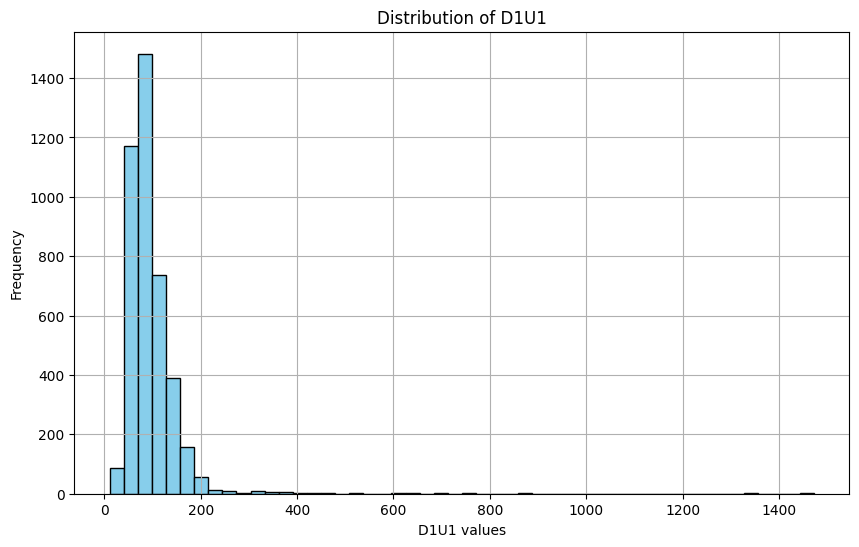

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(d1u1A['D1U1'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of D1U1")
plt.xlabel("D1U1 values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
d1u1N=dfil[dfil['emotionIndex']=='N']

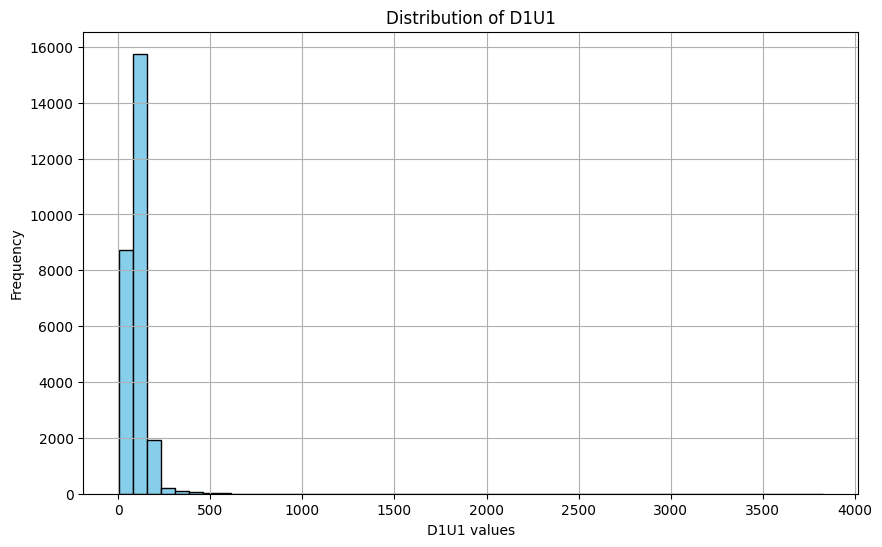

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(d1u1N['D1U1'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of D1U1")
plt.xlabel("D1U1 values")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [ ]:
data_free = pd.read_csv('/content/drive/MyDrive/Emotion Recognition/Dataset/Free Text Typing Dataset.csv', sep=';', low_memory=False)

In [ ]:
data_free

userid emotionIndex  index keyCode  \
0      5e1e2631d2dd163d472fd5ac     100            N    822  \u0011   
1      5e1e2631d2dd163d472fd5ad     100            N    823       v   
2      5e1e2631d2dd163d472fd5ae     100            N    824      \b   
3      5e1e2631d2dd163d472fd5af     100            N    825      \b   
4      5e1e2631d2dd163d472fd5b0     100            N    826      \b   
...                         ...     ...          ...    ...     ...   
28407  5e7aae4cd2dd163d4730fdd0     113            N  29229       o   
28408  5e7aae4cd2dd163d4730fdd1     113            N  29230       n   
28409  5e7aae4cd2dd163d4730fdd2     113            N  29231       ¾   
28410  5e7aae4cd2dd163d4730fdd3     113            N  29232           
28411  5e7aae4cd2dd163d4730fdd4     113            N  29233      \b   

                keyDown             keyUp               D1U1  \
0      1579030000000,00  1579030000000,00             982,00   
1      1579030000000,00  1579030000000,00              55,00   
2      1579030000000,00               NaN  -1579030000000,00   
3      1579030000000,00               NaN  -1579030000000,00   
4      1579030000000,00               NaN  -1579030000000,00   
...                 ...               ...                ...   
28407  1585100000000,00  1585100000000,00              88,00   
28408  1585100000000,00  1585100000000,00              67,00   
28409  1585100000000,00  1585100000000,00              71,00   
28410  1585100000000,00  1585100000000,00             108,00   
28411  1585100000000,00  1585100000000,00              79,00   

                    D1U2      D1D2              U1D2               U1U2  \
0                 764,00    709,00           -273,00            -218,00   
1      -1579030000000,00  23415,00          23360,00  -1579030000000,00   
2      -1579030000000,00    607,00  1579030000000,00               0,00   
3      -1579030000000,00     35,00  1579030000000,00               0,00   
4      -1579030000000,00     42,00  1579030000000,00               0,00   
...                  ...       ...               ...                ...   
28407             169,00    102,00             14,00              81,00   
28408             174,00    103,00             36,00             107,00   
28409             213,00    105,00             34,00             142,00   
28410             301,00    222,00            114,00             193,00   
28411                NaN       NaN               NaN                NaN   

                    D1U3      D1D3 answer  
0      -1579030000000,00  24124,00    NaN  
1      -1579030000000,00  24022,00    NaN  
2      -1579030000000,00    642,00    NaN  
3      -1579030000000,00     77,00    NaN  
4      -1579030000000,00     79,00    NaN  
...                  ...       ...    ...  
28407             276,00    205,00    NaN  
28408             316,00    208,00    NaN  
28409             406,00    327,00    NaN  
28410                NaN       NaN    NaN  
28411                NaN       NaN    NaN  

[28412 rows x 15 columns]

In [ ]:
data_free['userid']=data_free['userid'].astype(float)

In [ ]:
data_free['userid'].nunique()

81

In [ ]:
data_free['keyCode'].unique()

array(['\\u0011', 'v', '\\b', ' ', 'm', 'y', 'd', 'a', 'w', 's', 'o', 'n',
       'i', 'p', 'e', 't', 'l', 'h', 'g', '¼', 'c', 'u', 'r', 'x', 'b',
       '\\u0014', '4', 'f', 'k', '\\u0010', '¾', '6', '¿', 'û', 'ß', '%',
       "'", '&', '\\r', '.', 'j', 'å', '9', '0', 'þ', 'º', '7', '3', '1',
       '»', '8', 'q', '`', '5', '©', nan, 'â', 'z', 'à', '2', '¡', '#',
       'ü', '\\u0012', '\x90', 'ý', '(', '½'], dtype=object)

In [ ]:
for col in ['keyDown', 'keyUp']:
    data_free[col] = data_fixed[col].astype(str).str.replace(',', '.').astype(float)

In [ ]:
for col in ['D1U1','D1U2','U1D2','U1U2','D1U3','D1D2','D1D3']:
    data_free[col] = data_free[col].astype(str).str.replace(',', '.').astype(float)

In [ ]:
data_free.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28412 entries, 0 to 28411
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0                 28412 non-null  object 
 1   userid        28412 non-null  float64
 2   emotionIndex  28412 non-null  object 
 3   index         28412 non-null  int64  
 4   keyCode       28405 non-null  object 
 5   keyDown       28412 non-null  float64
 6   keyUp         27474 non-null  float64
 7   D1U1          28405 non-null  float64
 8   D1U2          28172 non-null  float64
 9   D1D2          28172 non-null  float64
 10  U1D2          28172 non-null  float64
 11  U1U2          28172 non-null  float64
 12  D1U3          27938 non-null  float64
 13  D1D3          27938 non-null  float64
 14  answer        7660 non-null   object 
dtypes: float64(10), int64(1), object(4)
memory usage: 3.3+ MB


In [ ]:
data_free.describe()

userid        index       keyDown         keyUp          D1U1  \
count  28412.000000  28412.00000  2.841200e+04  2.747400e+04  2.840500e+04   
mean     104.836689  15027.50000  1.580000e+12  1.580000e+12 -1.414404e+11   
std       36.931115   8201.98226  0.000000e+00  0.000000e+00  4.511625e+11   
min       19.000000    822.00000  1.580000e+12  1.580000e+12 -1.584100e+12   
25%       77.000000   7924.75000  1.580000e+12  1.580000e+12  6.400000e+01   
50%      109.000000  15027.50000  1.580000e+12  1.580000e+12  8.800000e+01   
75%      130.000000  22130.25000  1.580000e+12  1.580000e+12  1.150000e+02   
max      193.000000  29233.00000  1.580000e+12  1.580000e+12  3.843000e+03   

               D1U2           D1D2          U1D2          U1U2          D1U3  \
count  2.817200e+04   28172.000000  2.817200e+04  2.817200e+04  2.793800e+04   
mean  -1.415993e+11     405.406858  1.425541e+11  9.548687e+08 -1.418226e+11   
std    4.513891e+11    2106.174516  4.527602e+11  1.583960e+11  4.517081e+11   
min   -1.584100e+12       0.000000 -2.148000e+03 -1.584100e+12 -1.584100e+12   
25%    2.240000e+02     136.000000  6.500000e+01  1.290000e+02  4.000000e+02   
50%    2.970000e+02     202.000000  1.380000e+02  2.010000e+02  5.490000e+02   
75%    4.350000e+02     337.000000  3.620000e+02  3.370000e+02  8.280000e+02   
max    2.080970e+05  207952.000000  1.584100e+12  1.584100e+12  2.223170e+05   

                D1D3  
count   27938.000000  
mean      809.720739  
std      3102.161804  
min         8.000000  
25%       315.000000  
50%       460.000000  
75%       734.000000  
max    222266.000000

In [ ]:
data_free.isnull().sum()

0
userid              0
emotionIndex        0
index               0
keyCode             7
keyDown             0
keyUp             938
D1U1                7
D1U2              240
D1D2              240
U1D2              240
U1U2              240
D1U3              474
D1D3              474
answer          20752
dtype: int64

In [ ]:
data_freq= pd.read_csv('/content/drive/MyDrive/Emotion Recognition/Dataset/Frequency Dataset.csv', sep=';', low_memory=False)

In [ ]:
data_freq[data_freq['User ID']==100]

User ID textIndex emotionIndex  delFreq  leftFreq   TotTime
0        100        FI            N        8         1  192762.0
1        100        FR            N      145         0       NaN
2        100        FR            H        0         0       NaN
3        100        FI            H       11         0   99463.0
242      100        FI            N        3         0   59950.0
243      100        FR            N       14         0       NaN
244      100        FR            H        1         0       NaN
245      100        FI            H        2         0   23626.0
338      100        FI            N        4         4  115687.0
339      100        FR            N        4         0       NaN
342      100        FR            A        0         0       NaN
343      100        FI            A        2        10   94165.0

In [ ]:
data_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       478 non-null    int64  
 1   textIndex     478 non-null    object 
 2   emotionIndex  478 non-null    object 
 3   delFreq       478 non-null    int64  
 4   leftFreq      478 non-null    int64  
 5   TotTime       243 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 22.5+ KB


In [ ]:
data_freq.describe()

User ID     delFreq    leftFreq        TotTime
count  478.000000  478.000000  478.000000     243.000000
mean   101.830544    9.688285    0.761506   84708.061728
std     37.599603   15.582912    3.453437   77239.131115
min     19.000000    0.000000    0.000000   16968.000000
25%     73.000000    2.000000    0.000000   51786.000000
50%    104.000000    6.000000    0.000000   64643.000000
75%    130.000000   11.000000    0.000000   91826.500000
max    193.000000  145.000000   32.000000  684946.000000

In [ ]:
data_freq['TotTime'].isnull().sum()

np.int64(235)

In [ ]:
data_freq['leftFreq'].value_counts()

leftFreq
0     425
1      16
5       6
3       5
4       5
2       3
9       3
16      2
10      2
32      2
6       2
31      1
8       1
11      1
13      1
20      1
27      1
12      1
Name: count, dtype: int64

In [ ]:
data_user= pd.read_csv('/content/drive/MyDrive/Emotion Recognition/Dataset/Participants Information.csv', sep=';', low_memory=False)

In [ ]:
data_user

userId typeWith         typistType                       pcTimeAverage  \
0       100  2 hands       Touch Typist           More than 3 hours per day   
1       113  2 hands  Two Finger Typist           less than an hour per day   
2        58  2 hands       Touch Typist           More than 3 hours per day   
3        63  2 hands  One Finger Typist  between 1 hour and 3 hours per day   
4        84   1 hand  One Finger Typist           less than an hour per day   
..      ...      ...                ...                                 ...   
118      86  2 hands       Touch Typist           less than an hour per day   
119      56  2 hands       Touch Typist           More than 3 hours per day   
120      41  2 hands       Touch Typist           More than 3 hours per day   
121      72  2 hands       Touch Typist           More than 3 hours per day   
122     113  2 hands       Touch Typist           More than 3 hours per day   

    ageRange  gender        status              degree   country  
0      16-19  Female       Student  College/University   Tunisia  
1      20-29  Female       Student  College/University   Tunisia  
2      20-29  Female       Student  College/University   Tunisia  
3      20-29  Female       Student  College/University   Tunisia  
4       >=50    Male  Professional  College/University   Tunisia  
..       ...     ...           ...                 ...       ...  
118    30-39    Male  Professional  College/University   Tunisia  
119    20-29  Female       Student  College/University   Tunisia  
120    20-29  Female  Professional  College/University    France  
121    20-29  Female  Professional  College/University    France  
122    30-39    Male  Professional  College/University  Portugal  

[123 rows x 9 columns]

In [ ]:
a=pd.DataFrame(data_user['userId'].value_counts())

In [ ]:
a[a['count']>1]

count
userId       
93          4
130         3
131         3
122         3
100         3
104         3
87          3
181         3
147         3
73          3
120         2
94          2
174         2
101         2
67          2
70          2
110         2
121         2
72          2
123         2
113         2
106         2
56          2
109         2
112         2
114         2
144         2

In [ ]:
data_fixed[data_fixed['userId']=='93']

userId emotionIndex  index keyCode           keyDown             keyUp  \
33345     93            N  36793       o  1580000000000,00  1580000000000,00   
33346     93            N  36794       n  1580000000000,00  1580000000000,00   
33347     93            N  36795       c  1580000000000,00  1580000000000,00   
33348     93            N  36796       e  1580000000000,00  1580000000000,00   
33349     93            N  36797          1580000000000,00  1580000000000,00   
...      ...          ...    ...     ...               ...               ...   
40640     93            A  44088       w  1580000000000,00  1580000000000,00   
40641     93            A  44089       i  1580000000000,00  1580000000000,00   
40642     93            A  44090       f  1580000000000,00  1580000000000,00   
40643     93            A  44091       e  1580000000000,00  1580000000000,00   
40644     93            A  44092       n  1580000000000,00  1580000000000,00   

         D1U1     D1U2     D1D2     U1D2     U1U2     D1U3     D1D3 answer  
33345  117,00   389,00   213,00    96,00   272,00   930,00   759,00    NaN  
33346  176,00   717,00   546,00   370,00   541,00   899,00   751,00    NaN  
33347  171,00   353,00   205,00    34,00   182,00   676,00   549,00    NaN  
33348  148,00   471,00   344,00   196,00   323,00  2535,00  2436,00    NaN  
33349  127,00  2191,00  2092,00  1965,00  2064,00  2388,00  2268,00    NaN  
...       ...      ...      ...      ...      ...      ...      ...    ...  
40640  109,00   264,00   211,00   102,00   155,00   717,00   555,00      R  
40641   53,00   506,00   344,00   291,00   453,00   583,00   492,00      R  
40642  162,00   239,00   148,00   -14,00    77,00   395,00   311,00      R  
40643   91,00   247,00   163,00    72,00   156,00      NaN      NaN    NaN  
40644  -84,00      NaN      NaN      NaN      NaN      NaN      NaN    NaN  

[1687 rows x 14 columns]

In [ ]:
data_user['typistType'].unique()

array(['Touch Typist', 'Two Finger Typist', 'One Finger Typist'],
      dtype=object)

In [ ]:
data_user['pcTimeAverage'].unique()   # => less than an hour per day:1 / 'between 1 hour and 3 hours per day':2/'More than 3 hours per day';3

array(['More than 3 hours per day', 'less than an hour per day',
       'between 1 hour and 3 hours per day'], dtype=object)

In [ ]:
data_user['ageRange'].unique()

array(['16-19', '20-29', '>=50', '30-39'], dtype=object)

In [ ]:
data_user['status'].unique()

array(['Student', 'Professional'], dtype=object)

In [ ]:
data_user['degree'].unique()

array(['College/University', 'High School'], dtype=object)

In [ ]:
data_user['country'].unique()

array(['Tunisia', 'France', 'Suisse', 'Barbade', 'Germany', 'Canada',
       'Bahamas', 'Spain', 'United Arab Emirates', 'Italy',
       'United_States', 'Belgique', 'Arabie_Saoudite', 'Angola', 'Belize',
       'Portugal'], dtype=object)

In [ ]:
df=data_fixed.dropna()

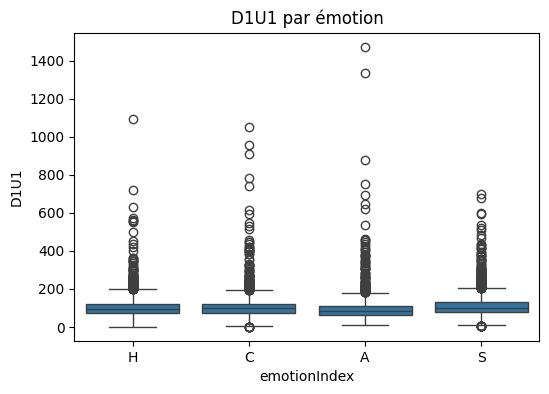

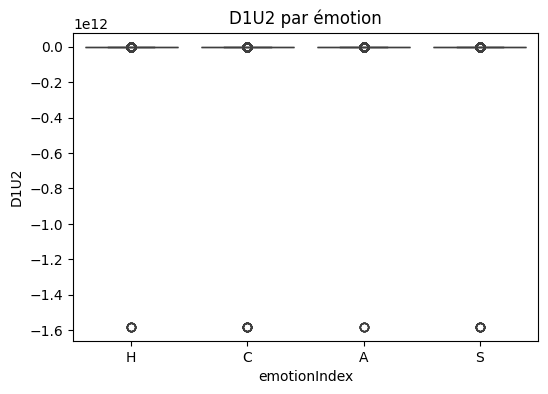

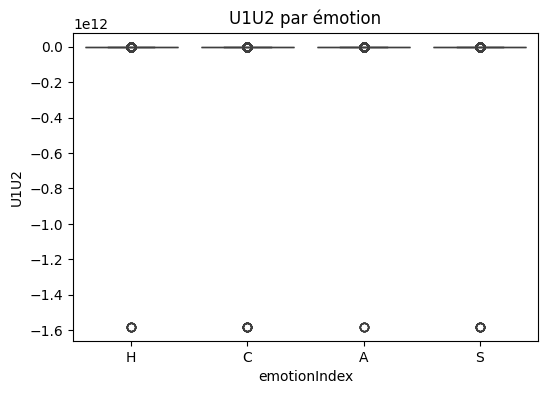

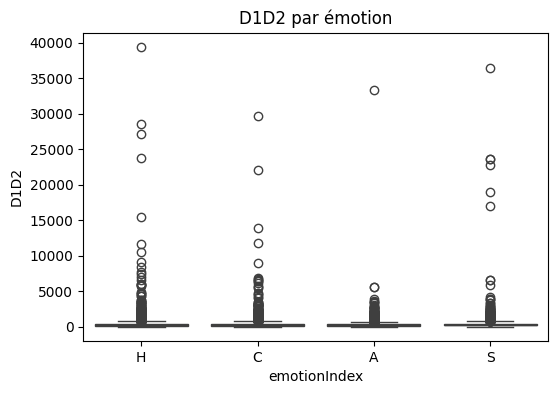

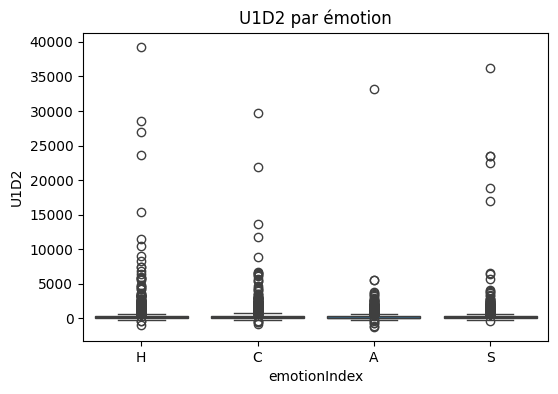

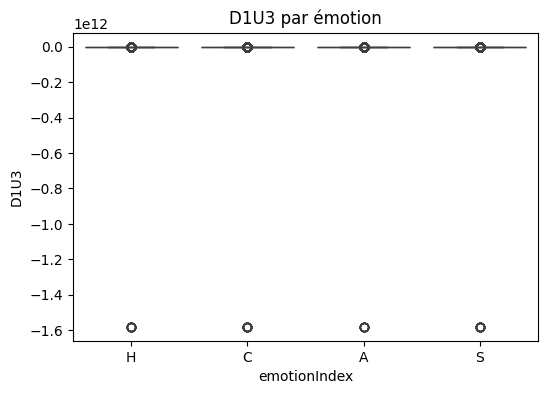

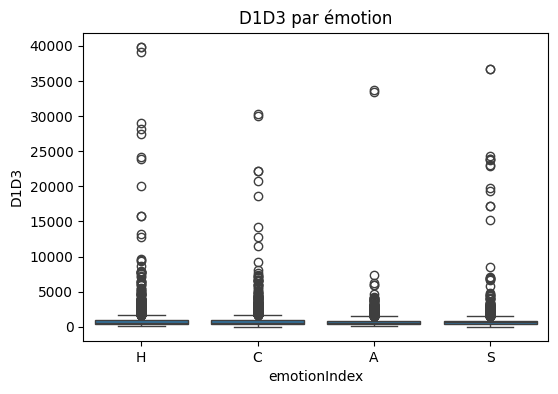

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='emotionIndex', y=feature, data=df)
    plt.title(f"{feature} par émotion")
    plt.show()


# **Plots emotions**

In [ ]:
dA=data_fixed[data_fixed['emotionIndex']=='A']
dS=data_fixed[data_fixed['emotionIndex']=='S']
dN=data_fixed[data_fixed['emotionIndex']=='N']
dH=data_fixed[data_fixed['emotionIndex']=='H']
dC=data_fixed[data_fixed['emotionIndex']=='C']

In [ ]:
dA.reset_index(drop=True, inplace=True)
dS.reset_index(drop=True, inplace=True)
dN.reset_index(drop=True, inplace=True)
dH.reset_index(drop=True, inplace=True)
dC.reset_index(drop=True, inplace=True)

In [ ]:
dA=dA.iloc[0:31]
dS=dS.iloc[0:31]
dN=dN.iloc[0:31]
dH=dH.iloc[0:31]
dC=dC.iloc[0:31]

In [ ]:
data_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46871 entries, 0 to 46870
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   userId        46871 non-null  float64
 1   emotionIndex  46871 non-null  object 
 2   index         46871 non-null  object 
 3   keyCode       46846 non-null  object 
 4   keyDown       46846 non-null  float64
 5   keyUp         45558 non-null  float64
 6   D1U1          46846 non-null  float64
 7   D1U2          46606 non-null  float64
 8   D1D2          46606 non-null  float64
 9   U1D2          46606 non-null  float64
 10  U1U2          46606 non-null  float64
 11  D1U3          46364 non-null  float64
 12  D1D3          46364 non-null  float64
 13  answer        18781 non-null  object 
dtypes: float64(10), object(4)
memory usage: 5.0+ MB


In [ ]:
data_fixed

userId emotionIndex  index keyCode       keyDown         keyUp   D1U1  \
0       100.0            N   3448       o  1.580000e+12  1.580000e+12   90.0   
1       100.0            N   3449       n  1.580000e+12  1.580000e+12   77.0   
2       100.0            N   3450       c  1.580000e+12  1.580000e+12  127.0   
3       100.0            N   3451       e  1.580000e+12  1.580000e+12   94.0   
4       100.0            N   3452          1.580000e+12  1.580000e+12   76.0   
...       ...          ...    ...     ...           ...           ...    ...   
46866    72.0            N  50314       t  1.580000e+12  1.580000e+12   57.0   
46867    72.0            N  50315       h  1.580000e+12  1.580000e+12   73.0   
46868    72.0            N  50316       e  1.580000e+12  1.580000e+12   90.0   
46869    72.0            N  50317       r  1.580000e+12  1.580000e+12  119.0   
46870    72.0            N  50318       n  1.580000e+12  1.580000e+12  125.0   

         D1U2    D1D2    U1D2    U1U2    D1U3    D1D3 answer  
0      2556.0  2479.0  2389.0  2466.0  2737.0  2610.0    NaN  
1       258.0   131.0    54.0   181.0   744.0   650.0    NaN  
2       613.0   519.0   392.0   486.0   795.0   719.0    NaN  
3       276.0   200.0   106.0   182.0  2304.0  2232.0    NaN  
4      2104.0  2032.0  1956.0  2028.0  2271.0  2191.0    NaN  
...       ...     ...     ...     ...     ...     ...    ...  
46866   211.0   138.0    81.0   154.0   376.0   286.0    NaN  
46867   238.0   148.0    75.0   165.0   461.0   342.0    NaN  
46868   313.0   194.0   104.0   223.0   655.0   530.0    NaN  
46869   461.0   336.0   217.0   342.0     NaN     NaN    NaN  
46870     NaN     NaN     NaN     NaN     NaN     NaN    NaN  

[46871 rows x 14 columns]

In [ ]:
data=data_fixed.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data['D1U1n'] = data_fixed[(data_fixed['D1U1'] != 1580000000000.0) & (data_fixed['D1U1'] != -1580000000000.0)]['D1U1']
data['D1U2n'] = data_fixed[(data_fixed['D1U2'] != 1580000000000.0) & (data_fixed['D1U2'] != -1580000000000.0)]['D1U2']
data['D1D2n'] =data_fixed[(data_fixed['D1D2'] != 1580000000000.0) & (data_fixed['D1D2'] != -1580000000000.0)]['D1D2']
data['U1U2n'] =data_fixed[(data_fixed['U1U2'] != 1580000000000.0) & (data_fixed['U1U2'] != -1580000000000.0)]['U1U2']
data['U1D2n'] =data_fixed[(data_fixed['U1D2'] != 1580000000000.0) & (data_fixed['U1D2'] != -1580000000000.0)]['U1D2']
data['D1U3n'] =data_fixed[(data_fixed['D1U3'] != 1580000000000.0) & (data_fixed['D1U3'] != -1580000000000.0)]['D1U3']
data['D1D3n'] =data_fixed[(data_fixed['D1D3'] != 1580000000000.0) & (data_fixed['D1D3'] != -1580000000000.0)]['D1D3']
data.reset_index(drop=True, inplace=True)

In [ ]:
dA=data[data['emotionIndex']=='A']
dS=data[data['emotionIndex']=='S']
dN=data[data['emotionIndex']=='N']
dH=data[data['emotionIndex']=='H']
dC=data[data['emotionIndex']=='C']

In [ ]:
dA=dA.iloc[0:31]
dS=dS.iloc[0:31]
dN=dN.iloc[0:31]
dH=dH.iloc[0:31]
dC=dC.iloc[0:31]

In [ ]:
dA.reset_index(drop=True, inplace=True)
dS.reset_index(drop=True, inplace=True)
dN.reset_index(drop=True, inplace=True)
dH.reset_index(drop=True, inplace=True)
dC.reset_index(drop=True, inplace=True)

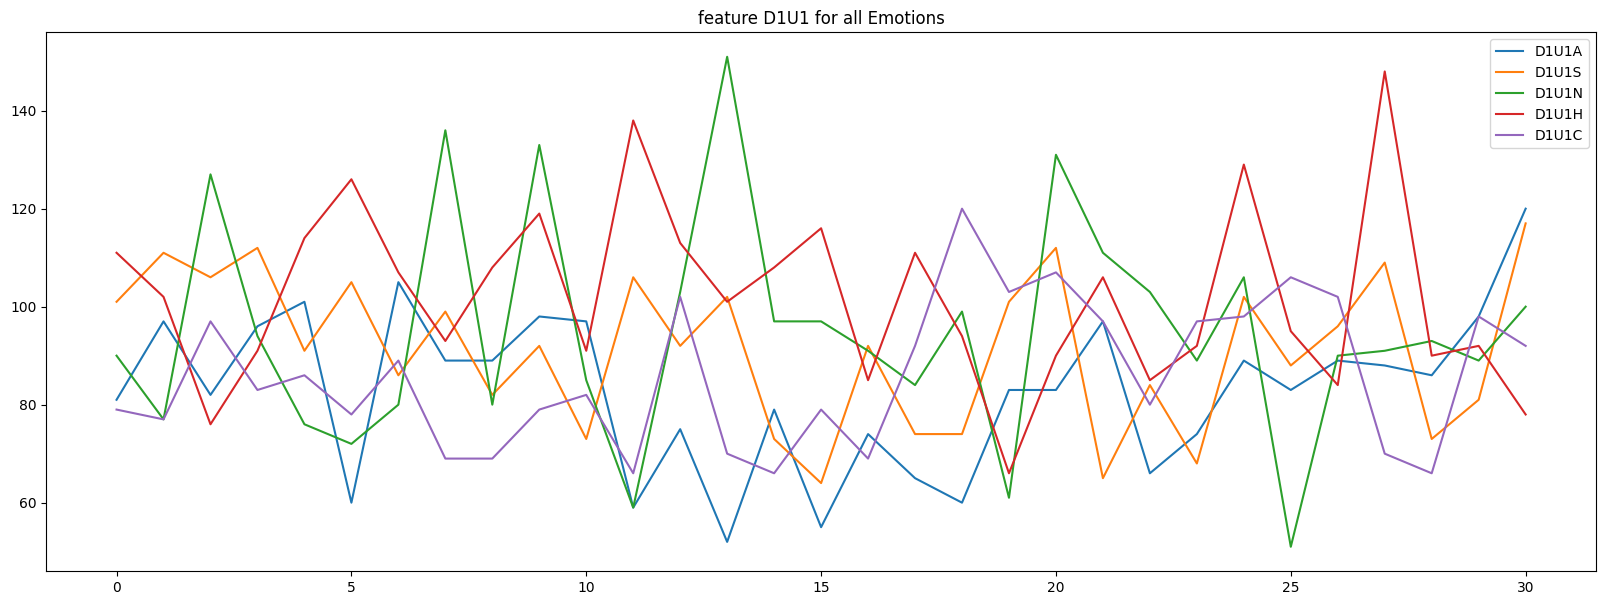

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(dA['D1U1'], label='D1U1A')
plt.plot(dS['D1U1'], label='D1U1S')
plt.plot(dN['D1U1'], label='D1U1N')
plt.plot(dH['D1U1'], label='D1U1H')
plt.plot(dC['D1U1'], label='D1U1C')
plt.title('feature D1U1 for all Emotions')
plt.legend()
plt.show()

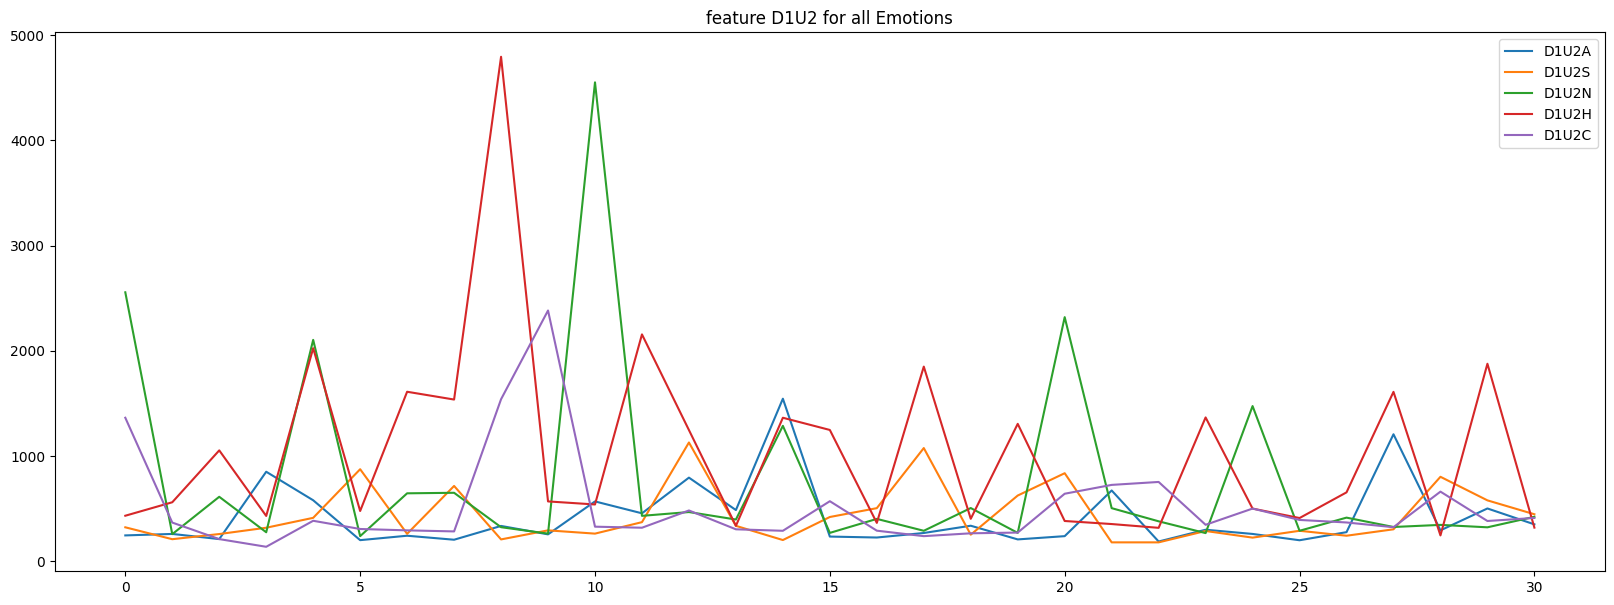

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(dA['D1U2'], label='D1U2A')
plt.plot(dS['D1U2'], label='D1U2S')
plt.plot(dN['D1U2'], label='D1U2N')
plt.plot(dH['D1U2'], label='D1U2H')
plt.plot(dC['D1U2'], label='D1U2C')
plt.title('feature D1U2 for all Emotions')
plt.legend()

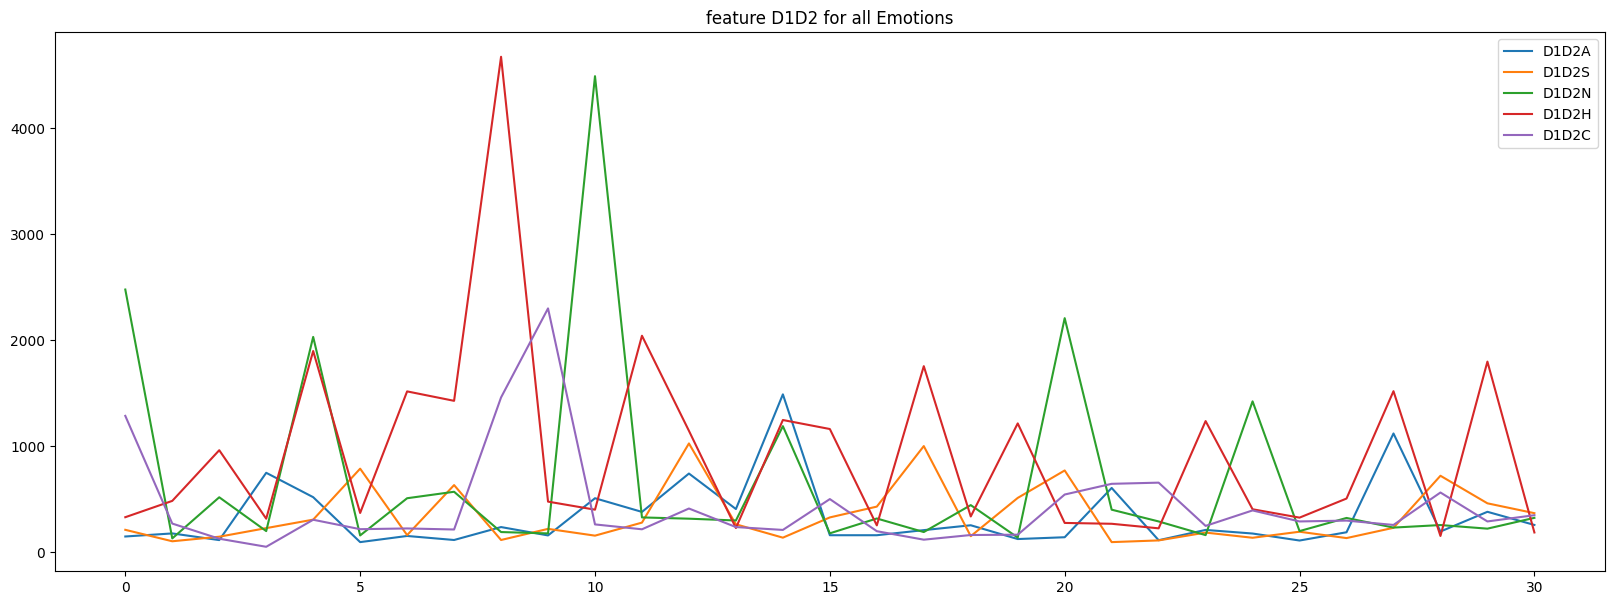

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(dA['D1D2'], label='D1D2A')
plt.plot(dS['D1D2'], label='D1D2S')
plt.plot(dN['D1D2'], label='D1D2N')
plt.plot(dH['D1D2'], label='D1D2H')
plt.plot(dC['D1D2'], label='D1D2C')
plt.title('feature D1D2 for all Emotions')
plt.legend()

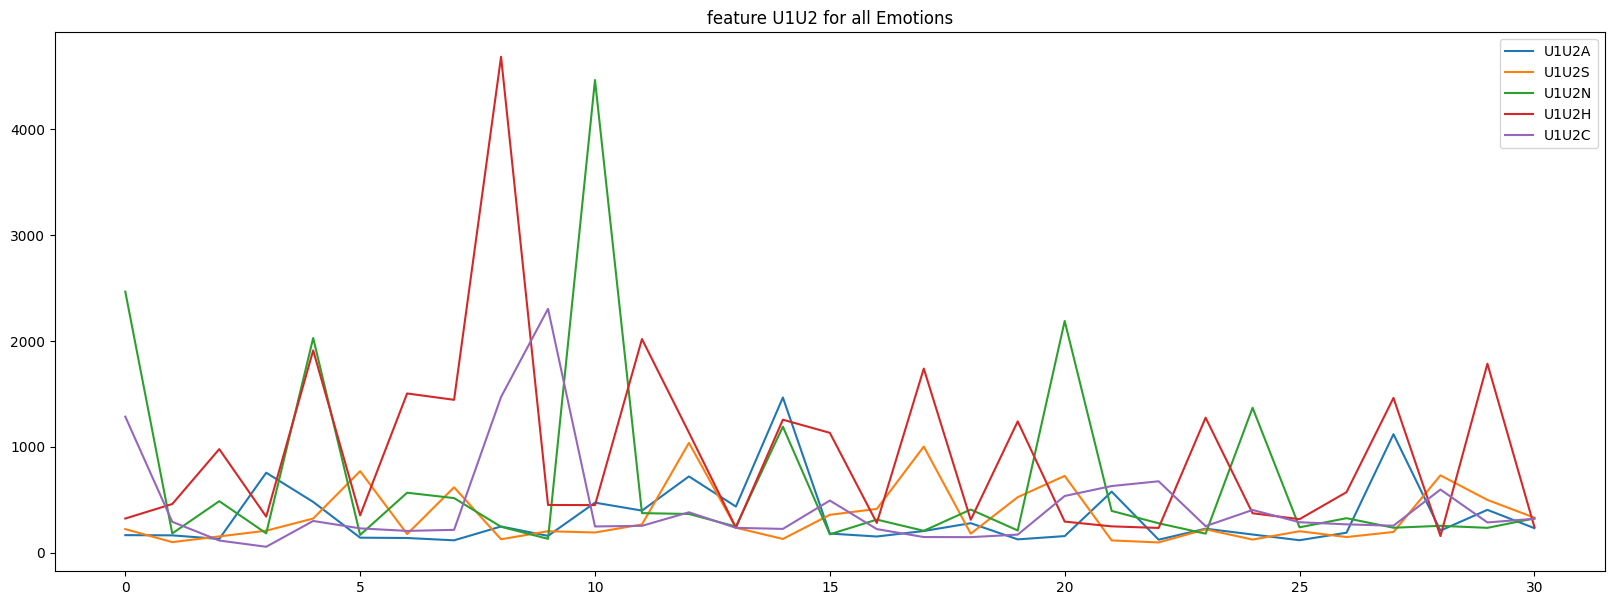

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(dA['U1U2'], label='U1U2A')
plt.plot(dS['U1U2'], label='U1U2S')
plt.plot(dN['U1U2'], label='U1U2N')
plt.plot(dH['U1U2'], label='U1U2H')
plt.plot(dC['U1U2'], label='U1U2C')
plt.title('feature U1U2 for all Emotions')
plt.legend()

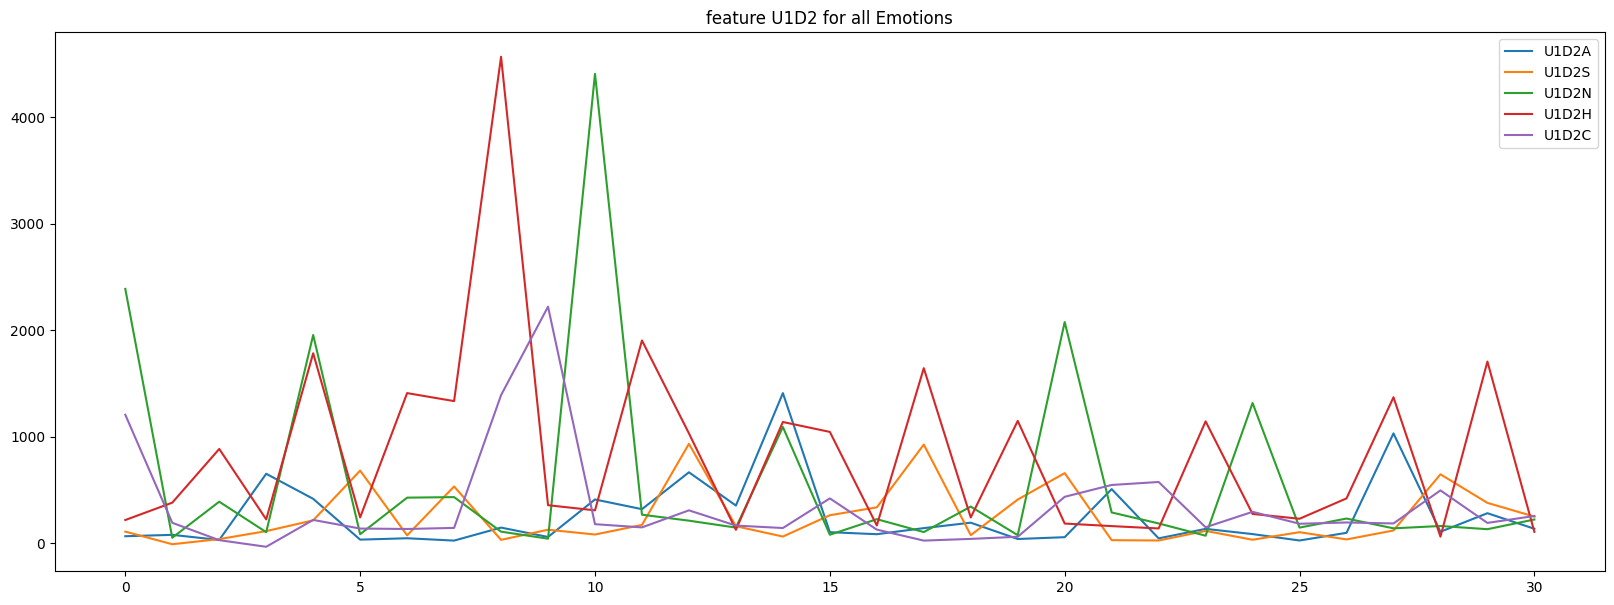

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(dA['U1D2'], label='U1D2A')
plt.plot(dS['U1D2'], label='U1D2S')
plt.plot(dN['U1D2'], label='U1D2N')
plt.plot(dH['U1D2'], label='U1D2H')
plt.plot(dC['U1D2'], label='U1D2C')
plt.title('feature U1D2 for all Emotions')
plt.legend()

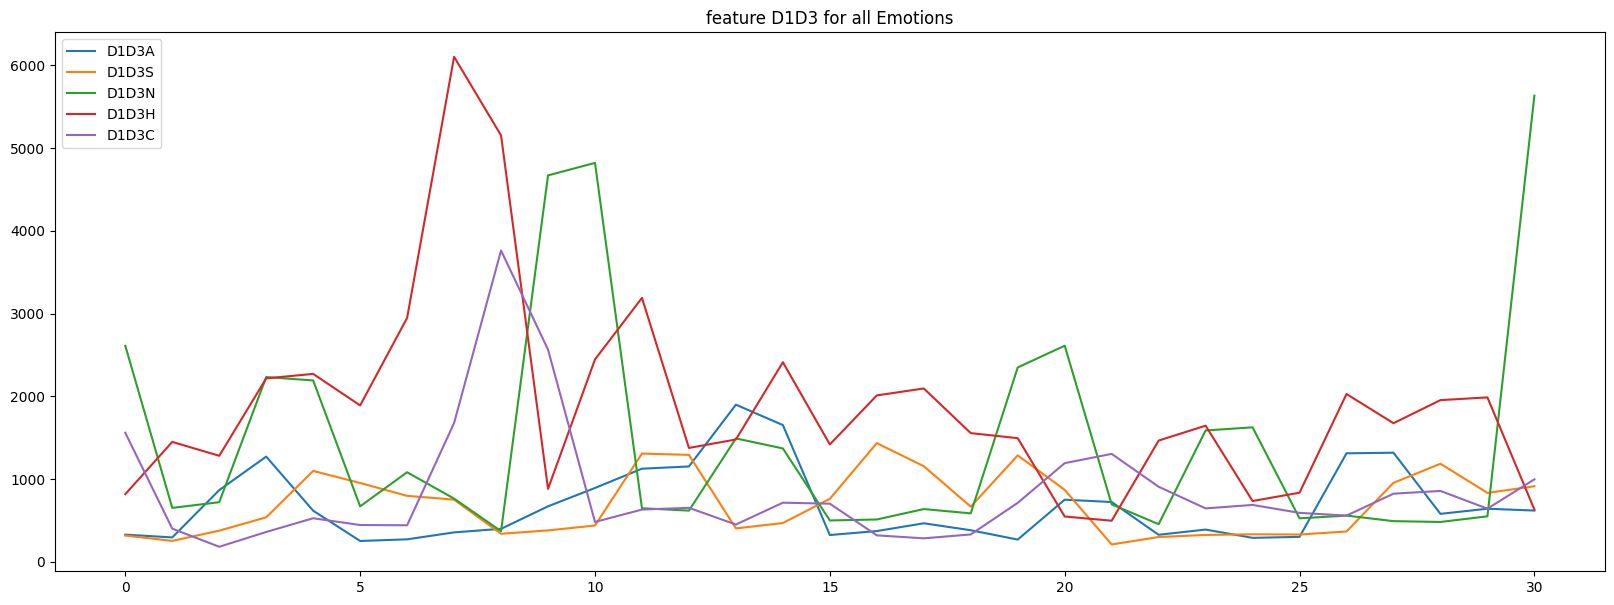

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(dA['D1D3'], label='D1D3A')
plt.plot(dS['D1D3'], label='D1D3S')
plt.plot(dN['D1D3'], label='D1D3N')
plt.plot(dH['D1D3'], label='D1D3H')
plt.plot(dC['D1D3'], label='D1D3C')
plt.title('feature D1D3 for all Emotions')
plt.legend()

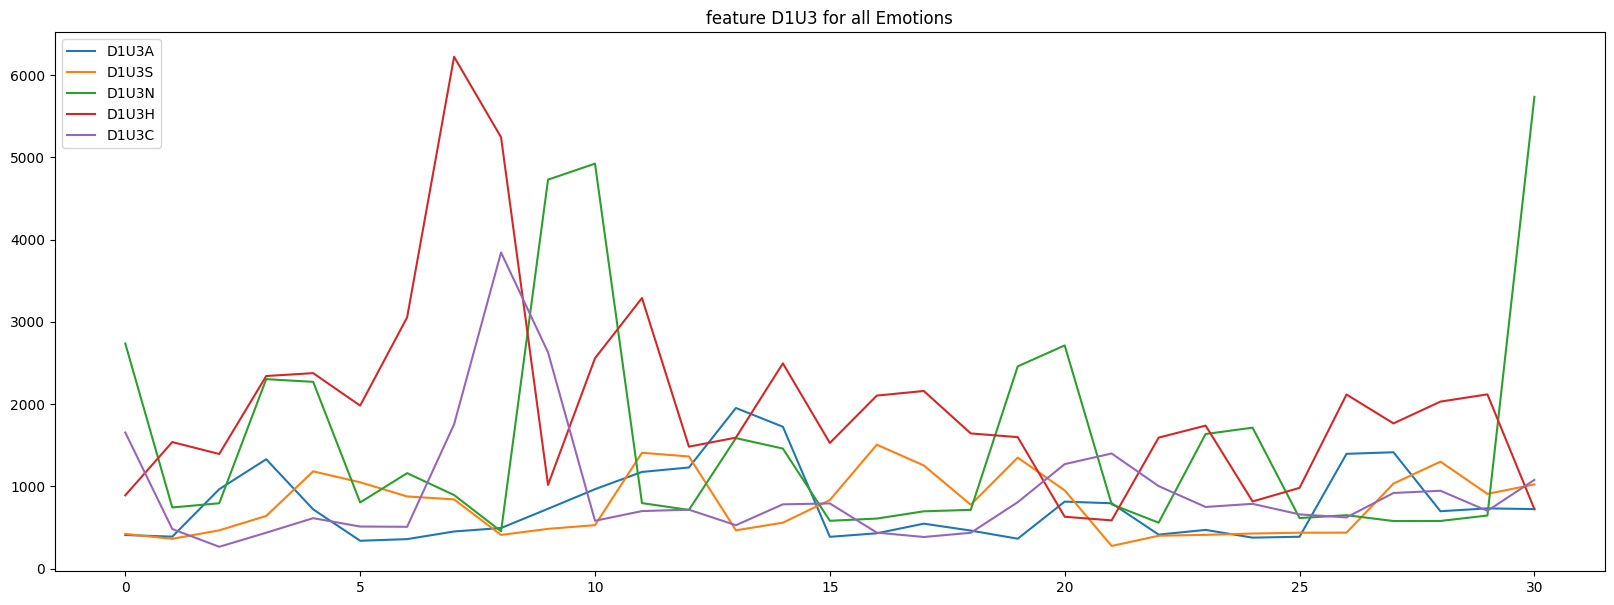

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(dA['D1U3'], label='D1U3A')
plt.plot(dS['D1U3'], label='D1U3S')
plt.plot(dN['D1U3'], label='D1U3N')
plt.plot(dH['D1U3'], label='D1U3H')
plt.plot(dC['D1U3'], label='D1U3C')
plt.title('feature D1U3 for all Emotions')
plt.legend()

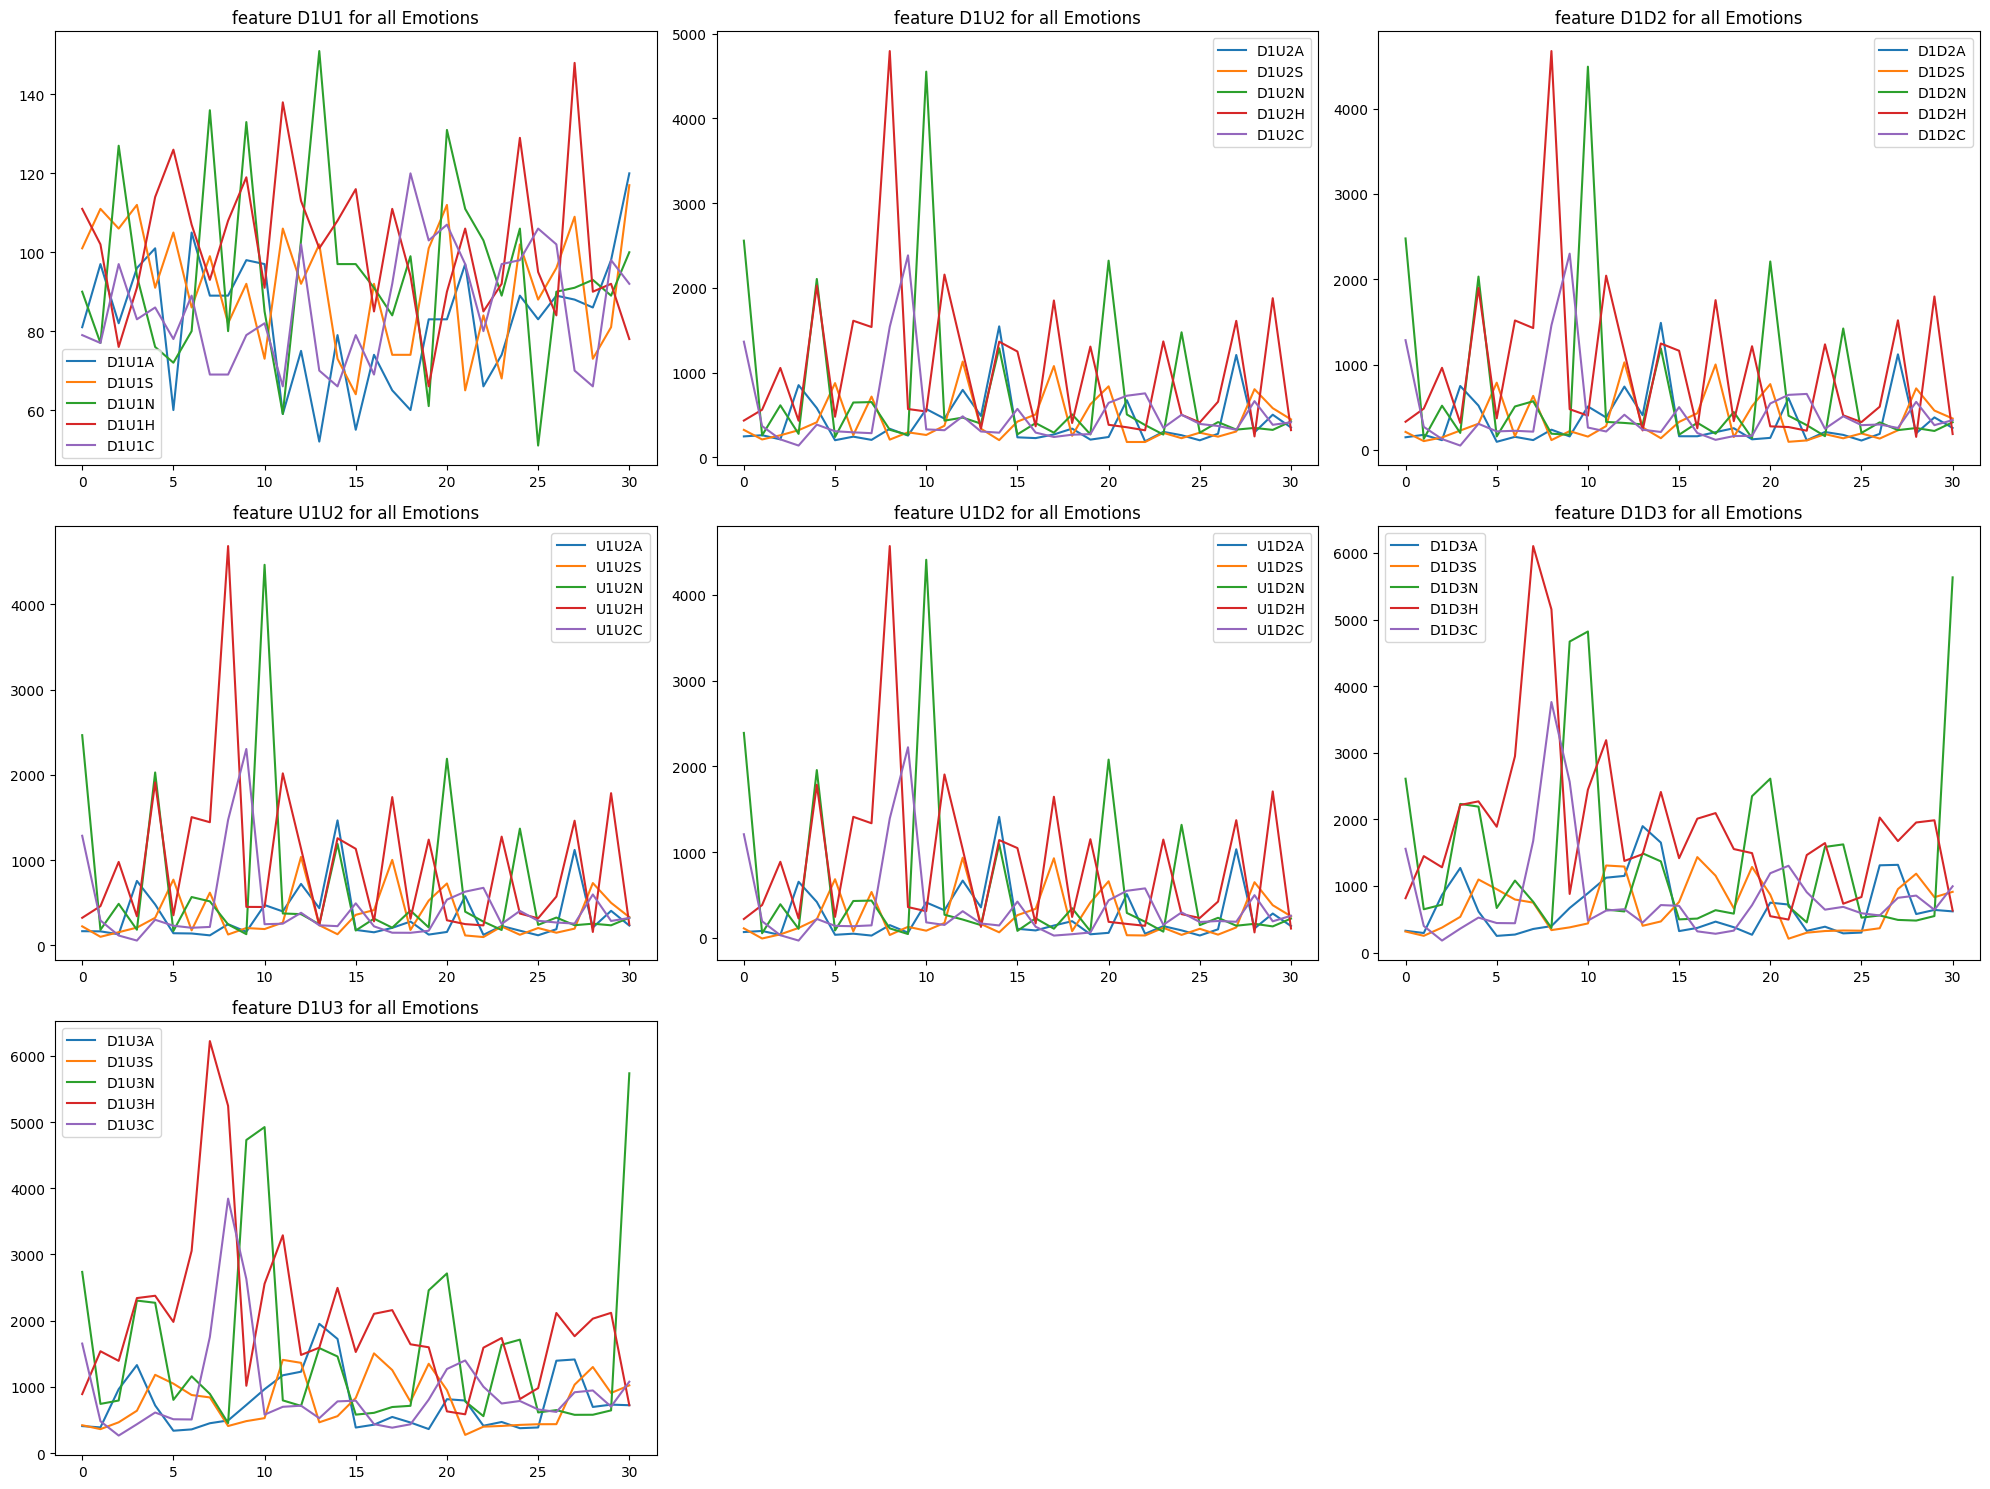

In [ ]:
import matplotlib.pyplot as plt

# Liste des features à tracer
features = ['D1U1', 'D1U2', 'D1D2', 'U1U2', 'U1D2', 'D1D3', 'D1U3']
titles = [f'feature {feat} for all Emotions' for feat in features]

# Créer une grille de sous-graphiques (3 colonnes max)
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()  # Aplatir la grille pour y accéder facilement

# Dictionnaire des données par émotion
data_dict = {
    'A': dA,
    'S': dS,
    'N': dN,
    'H': dH,
    'C': dC
}
# Tracer chaque feature dans un subplot
for i, (feat, title) in enumerate(zip(features, titles)):
    ax = axes[i]
    for key, df in data_dict.items():
        ax.plot(df[feat], label=f'{feat}{key}')
    ax.set_title(title)
    ax.legend()

# Cacher les subplot inutilisés (on n'a que 7 features)
for j in range(len(features), len(axes)):
    axes[j].axis('off')

# Ajuster l'espacement
plt.tight_layout()
plt.show()

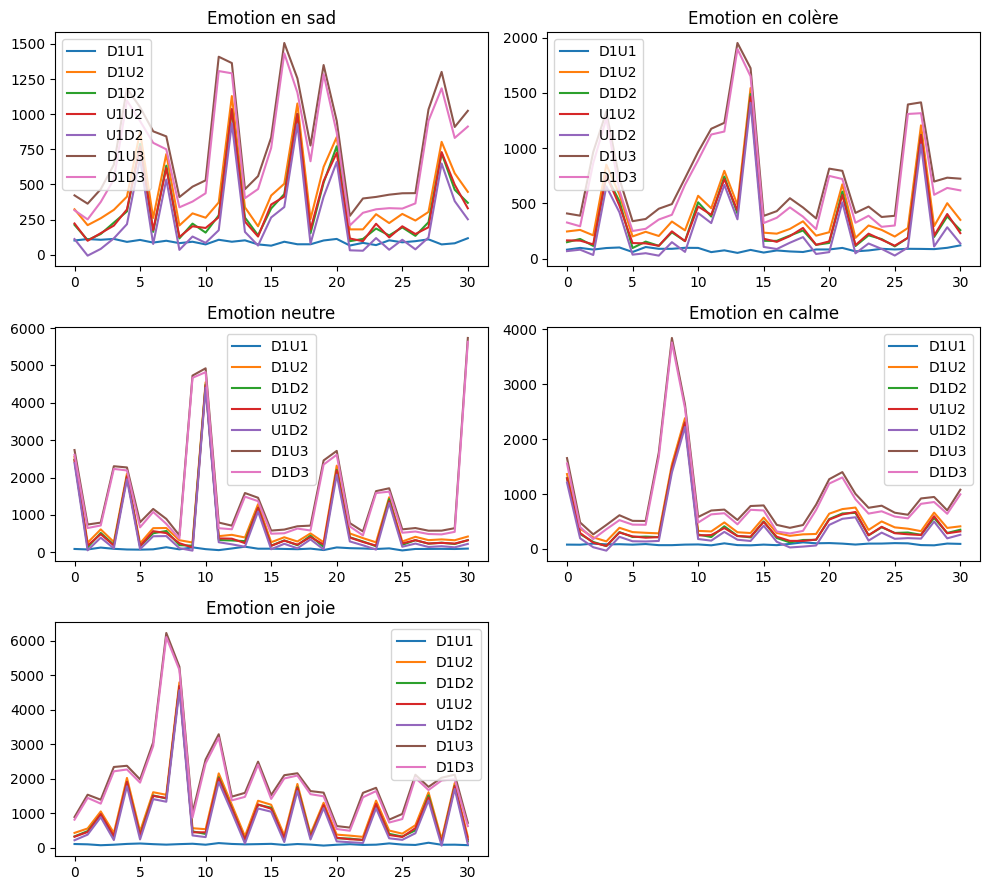

In [ ]:
import matplotlib.pyplot as plt

# Création d'une figure avec une grille 3x2
fig, axes = plt.subplots(3, 2, figsize=(10,9))
axes = axes.flatten()  # Aplatir pour accéder facilement à chaque subplot

# Fonction pour tracer sur un subplot donné
def plot_emotion(data, ax, title):
    ax.plot(data['D1U1'], label='D1U1')
    ax.plot(data['D1U2'], label='D1U2')
    ax.plot(data['D1D2'], label='D1D2')
    ax.plot(data['U1U2'], label='U1U2')
    ax.plot(data['U1D2'], label='U1D2')
    ax.plot(data['D1U3'], label='D1U3')
    ax.plot(data['D1D3'], label='D1D3')
    ax.set_title(title)
    ax.legend()

# Tracer chaque émotion dans un subplot
plot_emotion(dS, axes[0], 'Emotion en sad')
plot_emotion(dA, axes[1], 'Emotion en colère')
plot_emotion(dN, axes[2], 'Emotion neutre')
plot_emotion(dC, axes[3], 'Emotion en calme')
plot_emotion(dH, axes[4], 'Emotion en joie')

# Laisser le dernier axe (axes[5]) vide ou optionnellement ajouter un titre ou cacher
axes[5].axis('off')  # Désactiver le dernier subplot s'il est inutilisé

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

In [ ]:
dA=data_fixed[data_fixed['emotionIndex']=='A']
DAU1=dA[dA['userId']==113]
DAU2=dA[dA['userId']==58]
DAU3=dA[dA['userId']==144]
DAU4=dA[dA['userId']==87]

In [ ]:
DAU1

userId emotionIndex index keyCode       keyDown         keyUp   D1U1  \
28464   113.0            A  4427       j  1.580000e+12  1.580000e+12   81.0   
28465   113.0            A  4428       a  1.580000e+12  1.580000e+12   97.0   
28466   113.0            A  4429       k  1.580000e+12  1.580000e+12   82.0   
28467   113.0            A  4430       e  1.580000e+12  1.580000e+12   96.0   
28468   113.0            A  4431          1.580000e+12  1.580000e+12  101.0   
...       ...          ...   ...     ...           ...           ...    ...   
28630   113.0            A  4593          1.580000e+12  1.580000e+12  100.0   
28631   113.0            A  4594       w  1.580000e+12  1.580000e+12  105.0   
28632   113.0            A  4595       i  1.580000e+12  1.580000e+12  100.0   
28633   113.0            A  4596       f  1.580000e+12  1.580000e+12  141.0   
28634   113.0            A  4597       e  1.580000e+12  1.580000e+12  -92.0   

        D1U2   D1D2   U1D2   U1U2    D1U3    D1D3 answer  
28464  246.0  149.0   68.0  165.0   409.0   327.0      R  
28465  260.0  178.0   81.0  163.0   389.0   293.0      R  
28466  211.0  115.0   33.0  129.0   966.0   865.0      R  
28467  851.0  750.0  654.0  755.0  1330.0  1270.0      R  
28468  580.0  520.0  419.0  479.0   721.0   616.0      R  
...      ...    ...    ...    ...     ...     ...    ...  
28630  417.0  312.0  212.0  317.0   573.0   473.0      R  
28631  261.0  161.0   56.0  156.0   479.0   338.0      R  
28632  318.0  177.0   77.0  218.0   389.0   297.0      R  
28633  212.0  120.0  -21.0   71.0     NaN     NaN    NaN  
28634    NaN    NaN    NaN    NaN     NaN     NaN    NaN  

[171 rows x 14 columns]

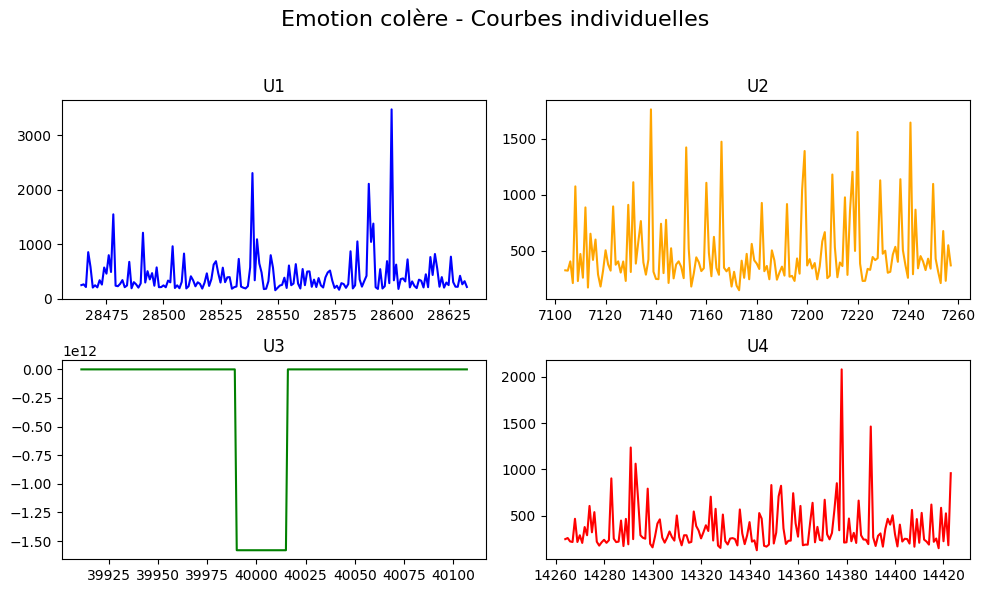

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10,6))  # 2 lignes, 2 colonnes

# Courbe 1
axs[0, 0].plot(DAU1['D1U2'], color='blue')
axs[0, 0].set_title('U1')

# Courbe 2
axs[0, 1].plot(DAU2['D1U2'], color='orange')
axs[0, 1].set_title('U2')

# Courbe 3
axs[1, 0].plot(DAU3['D1U2'], color='green')
axs[1, 0].set_title('U3')

# Courbe 4
axs[1, 1].plot(DAU4['D1U2'], color='red')
axs[1, 1].set_title('U4')

# Titre général
fig.suptitle("Emotion colère - Courbes individuelles", fontsize=16)

# Ajustement des espacements
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

In [ ]:
DAU3['D1U2'].values

array([ 2.000e+02,  1.295e+03,  1.222e+03,  3.470e+02,  9.800e+02,
        7.610e+02,  3.420e+02,  3.040e+02,  2.240e+02,  6.480e+02,
        6.680e+02,  1.700e+02,  3.140e+02,  3.090e+02,  7.300e+02,
        2.750e+02,  6.890e+02,  4.140e+02,  2.290e+02,  3.130e+02,
        2.300e+02,  3.290e+02,  3.980e+02,  3.300e+02,  2.080e+02,
        7.950e+02,  3.500e+02,  2.950e+02,  4.480e+02,  3.780e+02,
        2.280e+02,  2.305e+03,  3.720e+02,  5.170e+02,  4.890e+02,
        4.610e+02,  4.350e+02,  4.900e+02,  3.100e+02,  2.560e+02,
        3.270e+02,  3.430e+02,  3.100e+02,  7.880e+02,  4.950e+02,
        3.110e+02,  2.280e+02,  2.900e+02,  6.990e+02,  4.140e+02,
        2.190e+02,  2.630e+02,  3.490e+02,  7.730e+02,  3.320e+02,
        4.510e+02,  6.770e+02,  3.270e+02,  1.656e+03,  3.980e+02,
        3.350e+02,  8.280e+02,  1.623e+03,  4.350e+02,  4.960e+02,
        3.670e+02,  1.238e+03,  1.907e+03,  1.463e+03,  7.410e+02,
        1.325e+03,  2.950e+02,  9.930e+02,  8.010e+02,  3.870e

In [ ]:
dS=data_fixed[data_fixed['emotionIndex']=='S']
DSU1=dS[dS['userId']==113]
DSU2=dS[dS['userId']==58]
DSU3=dS[dS['userId']==144]
DSU4=dS[dS['userId']==87]

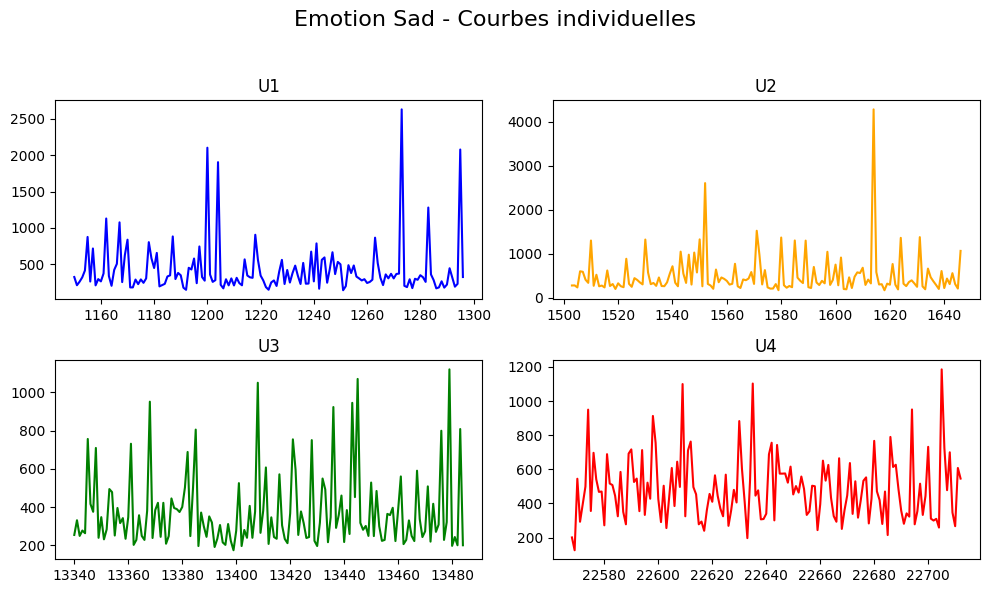

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10,6))  # 2 lignes, 2 colonnes

# Courbe 1
axs[0, 0].plot(DSU1['D1U2'], color='blue')
axs[0, 0].set_title('U1')

# Courbe 2
axs[0, 1].plot(DSU2['D1U2'], color='orange')
axs[0, 1].set_title('U2')

# Courbe 3
axs[1, 0].plot(DSU3['D1U2'], color='green')
axs[1, 0].set_title('U3')

# Courbe 4
axs[1, 1].plot(DSU4['D1U2'].iloc[1:], color='red')
axs[1, 1].set_title('U4')

# Titre général
fig.suptitle("Emotion Sad - Courbes individuelles", fontsize=16)

# Ajustement des espacements
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

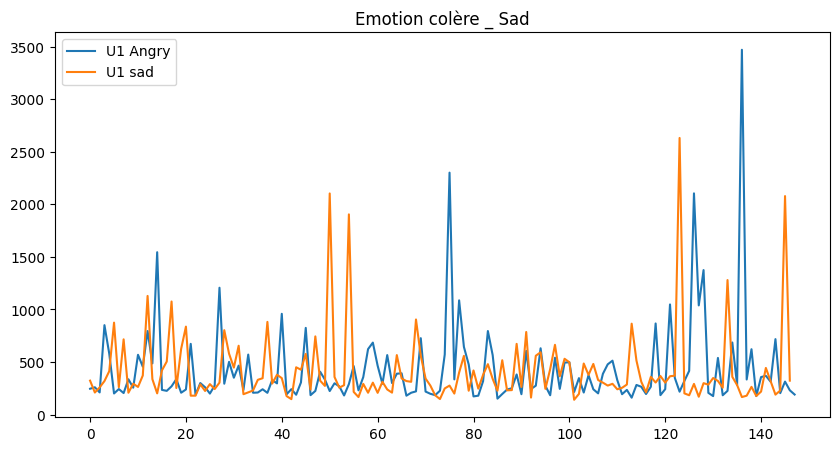

In [ ]:
plt.figure(figsize=(10, 5))
x = range(min(len(DAU1['D1U2']), len(DSU1['D1U2'])))  # axe commun
plt.plot(x, DAU1['D1U2'].iloc[:len(x)], label='U1 Angry')
plt.plot(x, DSU1['D1U2'].iloc[:len(x)], label='U1 sad')
plt.title('Emotion colère _ Sad')
plt.legend()
plt.show()

**std , mean per user per emotion**

In [ ]:
# Group by User and Emotion, then calculate mean and variance
summary = data_fixed.groupby(['userId', 'emotionIndex'])['D1D3'].agg(['mean', 'var']).reset_index()
MV13=pd.DataFrame(summary)

In [ ]:
MV13

userId emotionIndex         mean           var
0      13.0            N   945.152174  6.645179e+06
1      19.0            H   947.584000  6.848905e+05
2      19.0            N   808.254237  2.363101e+06
3      25.0            H   944.734513  5.362015e+05
4      25.0            N   824.185930  2.216914e+05
..      ...          ...          ...           ...
190   171.0            N  1796.477876  9.064950e+07
191   174.0            A   524.679487  7.026968e+04
192   174.0            N   803.509009  6.171338e+06
193   181.0            N  1232.933492  6.878725e+07
194   193.0            N   459.400000  6.627202e+04

[195 rows x 4 columns]

In [ ]:
# Group by User and Emotion, then calculate mean and variance
summary = data_fixed.groupby(['userId', 'emotionIndex'])['D1U2'].agg(['mean', 'var']).reset_index()
MV12=pd.DataFrame(summary)

In [ ]:
MV12

userId emotionIndex          mean           var
0      13.0            N  5.738967e+02  3.376998e+06
1      19.0            H  6.343889e+02  3.395008e+05
2      19.0            N -2.135135e+11  2.927524e+23
3      25.0            H  5.455877e+02  2.490531e+05
4      25.0            N  4.827550e+02  1.213247e+05
..      ...          ...           ...           ...
190   171.0            N -1.252863e+11  1.830622e+23
191   174.0            A  3.498854e+02  3.683765e+04
192   174.0            N -9.446935e+09  1.485912e+22
193   181.0            N -3.735224e+09  5.901655e+21
194   193.0            N  3.647917e+02  4.652012e+04

[195 rows x 4 columns]

**Relation delfreq,delLeft and emotion**

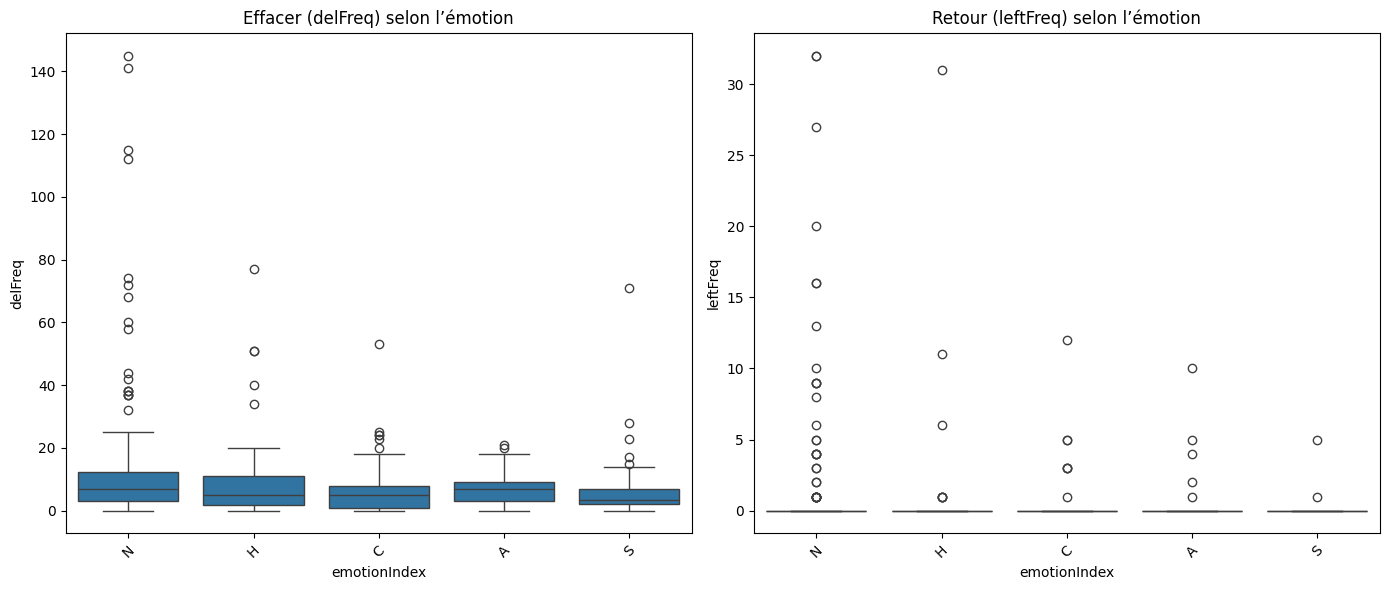

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=data_freq, x='emotionIndex', y='delFreq', ax=axs[0])
axs[0].set_title("Effacer (delFreq) selon l’émotion")
axs[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=data_freq, x='emotionIndex', y='leftFreq', ax=axs[1])
axs[1].set_title("Retour (leftFreq) selon l’émotion")
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


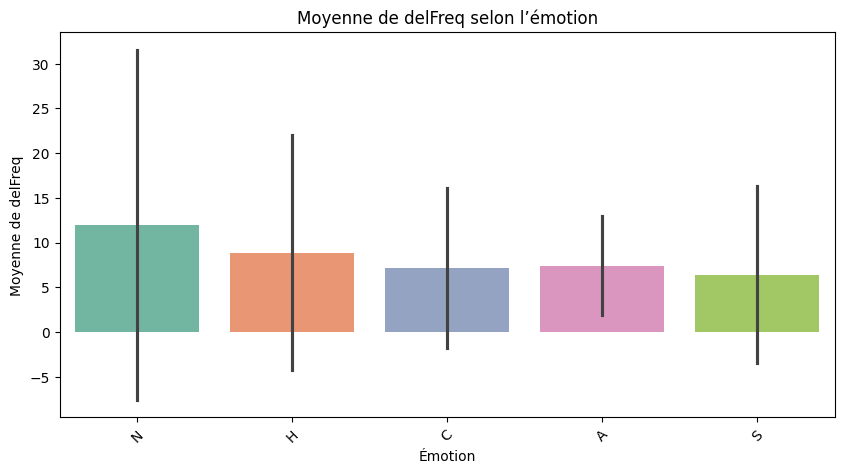

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=data_freq, x='emotionIndex',hue='emotionIndex', y='delFreq', estimator='mean',errorbar='sd', palette='Set2')
plt.title("Moyenne de delFreq selon l’émotion")
plt.xlabel("Émotion")
plt.ylabel("Moyenne de delFreq")
plt.xticks(rotation=45)
plt.show()


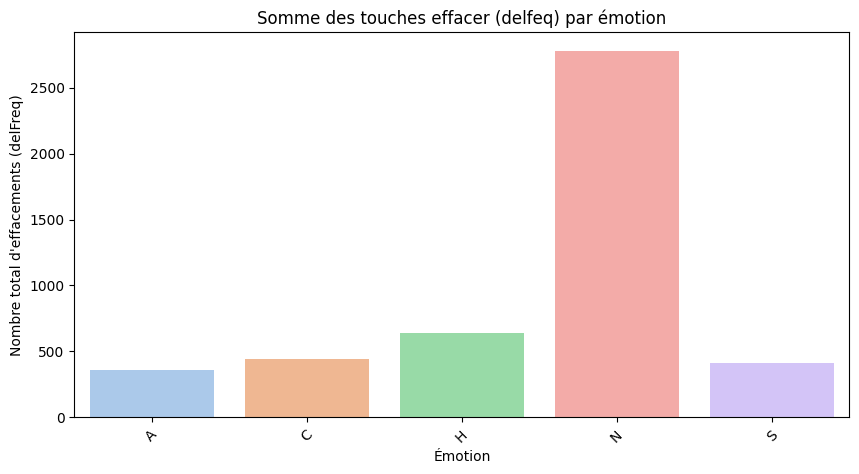

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Somme des delfeq par émotion
del_sum = data_freq.groupby('emotionIndex')['delFreq'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=del_sum, x='emotionIndex', y='delFreq',hue='emotionIndex',palette='pastel')
plt.title("Somme des touches effacer (delfeq) par émotion")
plt.xlabel("Émotion")
plt.ylabel("Nombre total d'effacements (delFreq)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
data_freq.groupby('emotionIndex')['delFreq'].describe()

count       mean        std  min   25%  50%    75%    max
emotionIndex                                                           
A              48.0   7.437500   5.550182  0.0  3.00  7.0   9.00   21.0
C              62.0   7.161290   8.962936  0.0  1.00  5.0   8.00   53.0
H              72.0   8.888889  13.158359  0.0  1.75  5.0  11.00   77.0
N             232.0  11.974138  19.561187  0.0  3.00  7.0  12.25  145.0
S              64.0   6.437500   9.939300  0.0  2.00  3.5   7.00   71.0

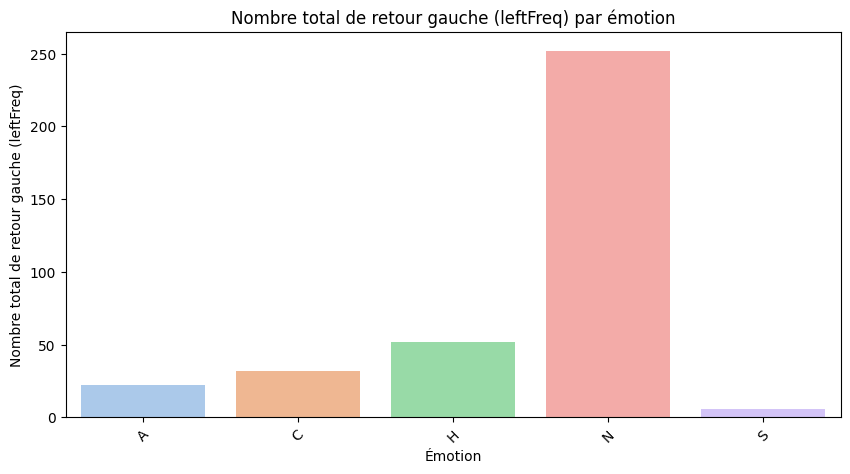

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Somme des delfeq par émotion
del_sum = data_freq.groupby('emotionIndex')['leftFreq'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=del_sum, x='emotionIndex',hue='emotionIndex', y='leftFreq', palette='pastel')
plt.title("Nombre total de retour gauche (leftFreq) par émotion")
plt.xlabel("Émotion")
plt.ylabel("Nombre total de retour gauche (leftFreq)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
data_freq.groupby('emotionIndex')['leftFreq'].describe()

count      mean       std  min  25%  50%  75%   max
emotionIndex                                                     
A              48.0  0.458333  1.700542  0.0  0.0  0.0  0.0  10.0
C              62.0  0.516129  1.835371  0.0  0.0  0.0  0.0  12.0
H              72.0  0.722222  3.908179  0.0  0.0  0.0  0.0  31.0
N             232.0  1.086207  4.251954  0.0  0.0  0.0  0.0  32.0
S              64.0  0.093750  0.635429  0.0  0.0  0.0  0.0   5.0

In [ ]:
data_neutre = data_freq[data_freq['emotionIndex'] == 'N']
data_happy = data_freq[data_freq['emotionIndex'] == 'H']
data_angry = data_freq[data_freq['emotionIndex'] == 'A']
data_sad = data_freq[data_freq['emotionIndex'] == 'S']

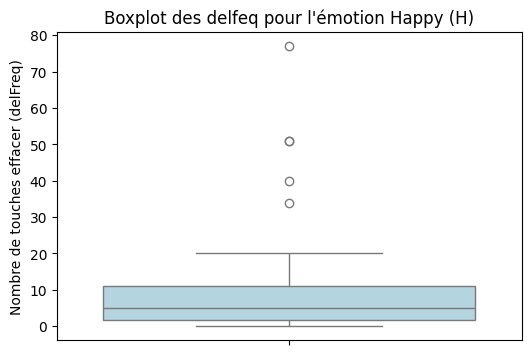

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(data=data_happy, y='delFreq', color='lightblue')
plt.title("Boxplot des delfeq pour l'émotion Happy (H)")
plt.ylabel("Nombre de touches effacer (delFreq)")
plt.show()


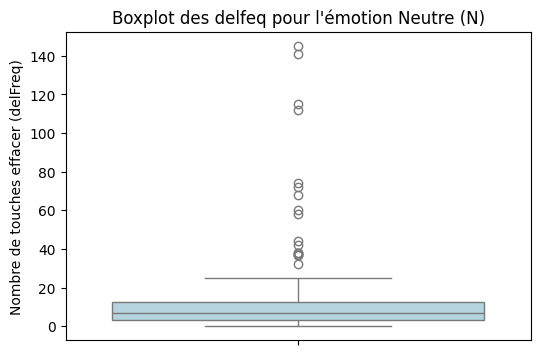

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(data=data_neutre, y='delFreq', color='lightblue')
plt.title("Boxplot des delfeq pour l'émotion Neutre (N)")
plt.ylabel("Nombre de touches effacer (delFreq)")
plt.show()


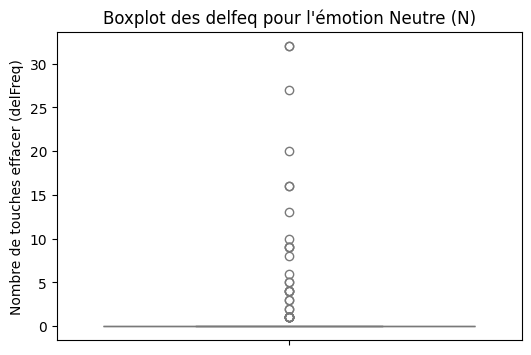

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(data=data_neutre, y='leftFreq', color='lightblue')
plt.title("Boxplot des delfeq pour l'émotion Neutre (N)")
plt.ylabel("Nombre de touches effacer (delFreq)")
plt.show()


In [ ]:
Q1 = data_neutre['delFreq'].quantile(0.25)
Q3 = data_neutre['delFreq'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data_neutre[(data_neutre['delFreq'] < lower_bound) | (data_neutre['delFreq'] > upper_bound)]
print("Nombre d'outliers :", len(outliers))
outliers

Nombre d'outliers : 18


User ID textIndex emotionIndex  delFreq  leftFreq  TotTime
1        100        FR            N      145         0      NaN
5        113        FR            N       44         0      NaN
33       139        FR            N      112         9      NaN
37       110        FR            N       37         0      NaN
52       141        FR            N       68         0      NaN
54       121        FR            N       58         9      NaN
83       122        FI            N       38        16   159535
84       122        FR            N       74        32      NaN
85        94        FI            N       32         0    74191
100       25        FR            N       38         0      NaN
108      101        FR            N       37         0      NaN
146      109        FR            N       38         0      NaN
162      130        FR            N       37         0      NaN
170       79        FR            N       72         0      NaN
250       19        FI            N       42         0   119528
259       49        FR            N      115        27      NaN
305      193        FR            N      141         0      NaN
335       93        FR            N       60         0      NaN

In [ ]:
Q1 = data_neutre['leftFreq'].quantile(0.25)
Q3 = data_neutre['leftFreq'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data_neutre[(data_neutre['leftFreq'] < lower_bound) | (data_neutre['leftFreq'] > upper_bound)]
print("Nombre d'outliers :", len(outliers))
outliers

Nombre d'outliers : 32


User ID textIndex emotionIndex  delFreq  leftFreq  TotTime
0        100        FI            N        8         1   192762
26        84        FI            N       10         1   208779
27        84        FR            N        0         1      NaN
32       139        FI            N        3         5   129700
33       139        FR            N      112         9      NaN
40        83        FI            N       12         1   106787
54       121        FR            N       58         9      NaN
79       126        FI            N        8         1    93320
81       131        FI            N        5        32    64934
83       122        FI            N       38        16   159535
84       122        FR            N       74        32      NaN
91        82        FI            N       17         2   262286
92        82        FR            N        6        10      NaN
113       70        FI            N       13         1   170386
124       31        FR            N        4         1      NaN
176      127        FR            N        9         8      NaN
193       87        FI            N        7         3   112325
194       87        FR            N        0        13      NaN
216       61        FI            N       23         1    97017
217       61        FR            N       13         4      NaN
235      138        FR            N        5         1      NaN
248      131        FI            N        7         5   177527
249      131        FR            N        3        20      NaN
258       49        FI            N       12         9    71064
259       49        FR            N      115        27      NaN
319      181        FR            N        5         3      NaN
338      100        FI            N        4         4   115687
369       77        FR            N        8         2      NaN
377       67        FI            N       11         4    61527
439      104        FI            N        9         6    92800
462       86        FI            N        8        16   172796
463       86        FR            N        2         4      NaN

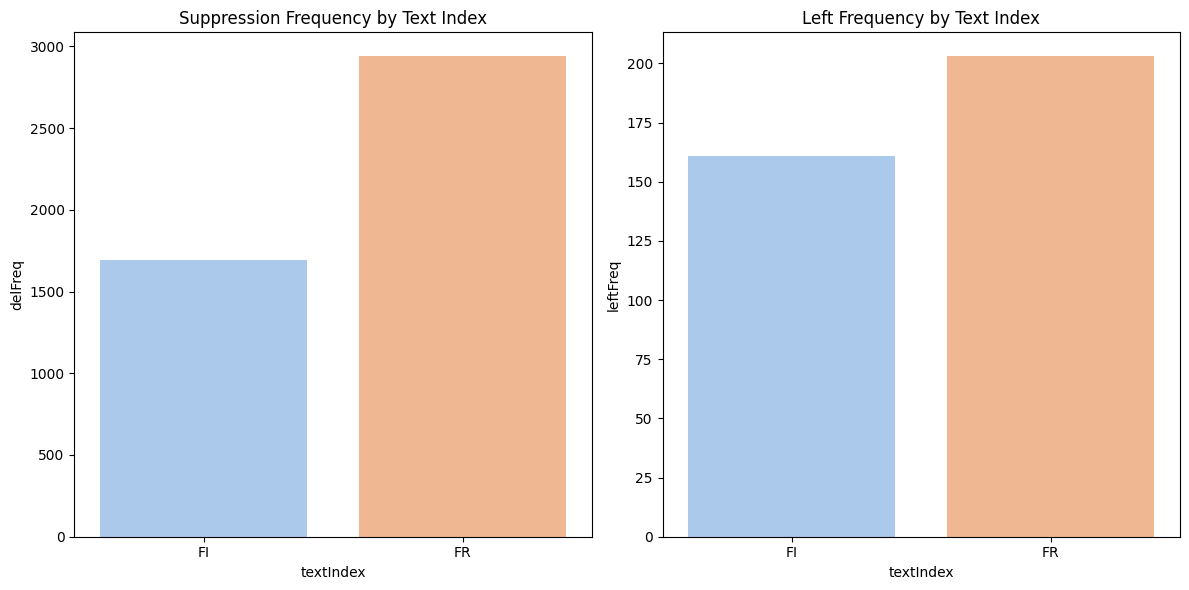

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Préparer les données
del_sum = data_freq.groupby('textIndex')['delFreq'].sum().reset_index()
left_sum = data_freq.groupby('textIndex')['leftFreq'].sum().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Barplot pour delFreq
sns.barplot(data=del_sum, x='textIndex', y='delFreq', hue='textIndex', palette='pastel', legend=False, ax=axs[0])
axs[0].set_title('Suppression Frequency by Text Index')

# Barplot pour leftFreq
sns.barplot(data=left_sum, x='textIndex', y='leftFreq', hue='textIndex', palette='pastel', legend=False, ax=axs[1])
axs[1].set_title('Left Frequency by Text Index')

plt.tight_layout()
plt.show()


***Nombre des phrases , nombre des caractéres de chaque utlisateurs selon émotion***

In [ ]:
user_emotions = {}
data_fixed = data_fixed.sort_values(by=['userId', 'emotionIndex']).reset_index(drop=True)

current_user = None
current_emotion = None
phrase_length = 0

for idx, row in data_fixed.iterrows():
    user = row['userId']
    emotion = row['emotionIndex']
    if user not in user_emotions:
        user_emotions[user] = {}
    if emotion not in user_emotions[user]:
        user_emotions[user][emotion] = []
    if (user != current_user) or (emotion != current_emotion):
        if phrase_length > 0:
            user_emotions[current_user][current_emotion].append(phrase_length)
        phrase_length = 1
        current_user = user
        current_emotion = emotion
    else:
        phrase_length += 1
if phrase_length > 0:
    user_emotions[current_user][current_emotion].append(phrase_length)

In [ ]:
userfree_emotions = {}
current_user = None
current_emotion = None
phrase_length = 0

for idx, row in data_free.iterrows():
    user = row['userid']
    emotion = row['emotionIndex']
    if user not in userfree_emotions:
        userfree_emotions[user] = {}
    if emotion not in userfree_emotions[user]:
        userfree_emotions[user][emotion] = []
    if (user != current_user) or (emotion != current_emotion):
        if phrase_length > 0:
            userfree_emotions[current_user][current_emotion].append(phrase_length)
        phrase_length = 1
        current_user = user
        current_emotion = emotion
    else:
        phrase_length += 1
if phrase_length > 0:
    userfree_emotions[current_user][current_emotion].append(phrase_length)
#*************************************************************************************************************
data_users=pd.DataFrame()
data_users['userid']=userfree_emotions.keys()
data_users = pd.DataFrame({'userid': list(userfree_emotions.keys())})
for idx, row in data_users.iterrows():
    user = row['userid']
    user_emotion_data = userfree_emotions[user]
    data_users.loc[idx,'N'] = len(user_emotion_data.get('N', [])) # Use .get with a default empty list
    data_users.loc[idx,'A'] = len(user_emotion_data.get('A', []))
    data_users.loc[idx,'S'] = len(user_emotion_data.get('S', []))
    data_users.loc[idx,'H'] = len(user_emotion_data.get('H', []))
    data_users.loc[idx,'C'] = len(user_emotion_data.get('C', []))
    data_users.loc[idx,'max'] = np.max([length for sublist in list(userfree_emotions[user].values()) for length in sublist])
    data_users.loc[idx,'min'] = np.min([length for sublist in list(userfree_emotions[user].values()) for length in sublist])
data_users['nombres phrases']=data_users['N']+data_users['A']+data_users['S']+data_users['H']+data_users['C']

In [ ]:
userfree_emotions

{100.0: {'N': [148, 306, 61], 'H': [57, 120], 'A': [67]},
 113.0: {'N': [125, 66], 'C': [99], 'H': [55], 'A': [53], 'S': [74]},
 58.0: {'N': [93], 'S': [44], 'C': [57], 'A': [58], 'H': [45]},
 63.0: {'N': [77], 'C': [83]},
 84.0: {'N': [71], 'H': [54]},
 139.0: {'N': [512], 'H': [76]},
 110.0: {'N': [217, 88], 'H': [46, 104], 'C': [137]},
 95.0: {'N': [98], 'S': [162]},
 130.0: {'N': [137, 426, 44], 'H': [58], 'A': [134]},
 122.0: {'N': [206, 479], 'S': [74]},
 141.0: {'N': [155]},
 121.0: {'N': [406, 69], 'S': [267], 'H': [477]},
 135.0: {'N': [90]},
 70.0: {'N': [57, 350], 'H': [53, 472]},
 170.0: {'N': [44], 'C': [68]},
 98.0: {'N': [47], 'H': [137]},
 120.0: {'N': [167, 297], 'H': [59], 'C': [48]},
 126.0: {'N': [184]},
 131.0: {'N': [91, 61, 51], 'C': [49]},
 94.0: {'N': [60, 167], 'H': [82], 'C': [46]},
 82.0: {'N': [56]},
 40.0: {'N': [47], 'C': [64]},
 73.0: {'N': [298, 102, 48], 'H': [42]},
 25.0: {'N': [80], 'H': [58]},
 171.0: {'N': [141], 'H': [77]},
 101.0: {'N': [243], 'A

In [ ]:
data_users

userid    N    A    S    H    C    max    min  nombres phrases
0    100.0  3.0  1.0  0.0  2.0  0.0  306.0   57.0              6.0
1    113.0  2.0  1.0  1.0  1.0  1.0  125.0   53.0              6.0
2     58.0  1.0  1.0  1.0  1.0  1.0   93.0   44.0              5.0
3     63.0  1.0  0.0  0.0  0.0  1.0   83.0   77.0              2.0
4     84.0  1.0  0.0  0.0  1.0  0.0   71.0   54.0              2.0
..     ...  ...  ...  ...  ...  ...    ...    ...              ...
76    47.0  1.0  1.0  0.0  0.0  0.0  279.0   98.0              2.0
77   174.0  1.0  1.0  0.0  0.0  0.0  131.0   54.0              2.0
78    72.0  2.0  0.0  1.0  0.0  0.0  105.0   49.0              3.0
79    86.0  1.0  0.0  0.0  0.0  0.0   51.0   51.0              1.0
80    41.0  1.0  0.0  1.0  0.0  1.0  142.0  116.0              3.0

[81 rows x 9 columns]

***TotalTime per user per emotion:***

In [ ]:
result = data_freq.groupby(['userid', 'emotionIndex', 'textIndex'])['TotTime'].mean().reset_index()
FI=result[result['textIndex']=='FI']
N=FI[FI['emotionIndex']=='N']
A=FI[FI['emotionIndex']=='A']
S=FI[FI['emotionIndex']=='S']

<ipython-input-113-e980a3390de7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=N,x='User ID', y='TotTime', palette='pastel')


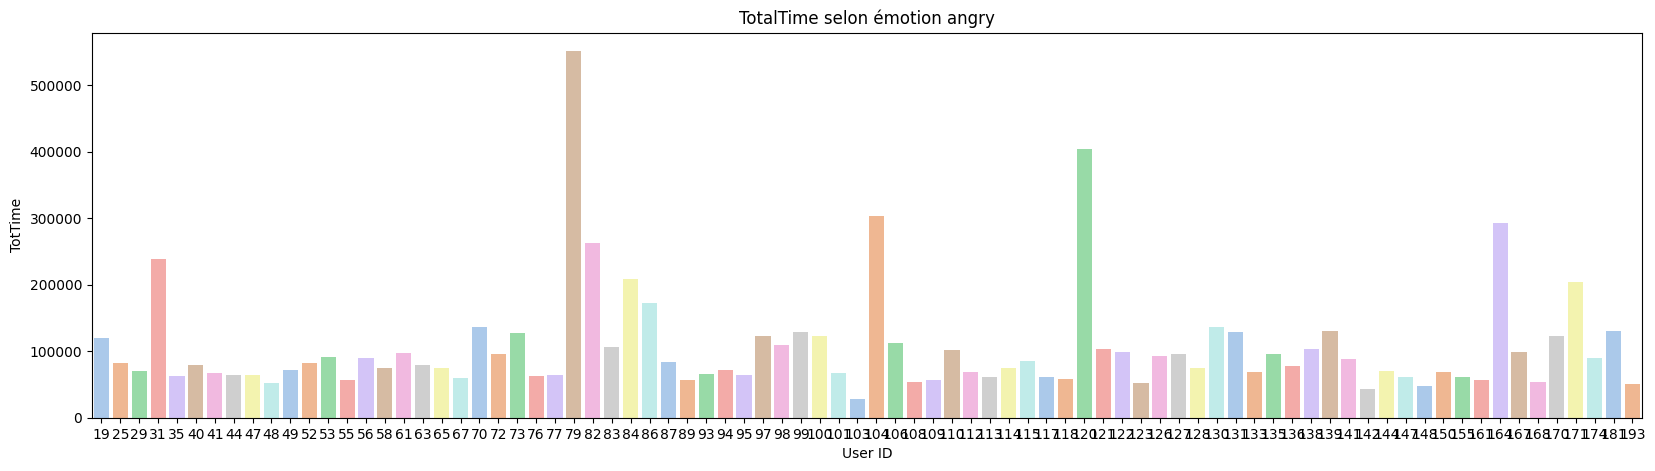

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))
sns.barplot(data=N,x='User ID', y='TotTime', palette='pastel')
plt.title("TotalTime selon émotion angry")
plt.show()

<ipython-input-112-ea5cb88b00a4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=A,x='User ID', y='TotTime',palette='pastel',legend=False)


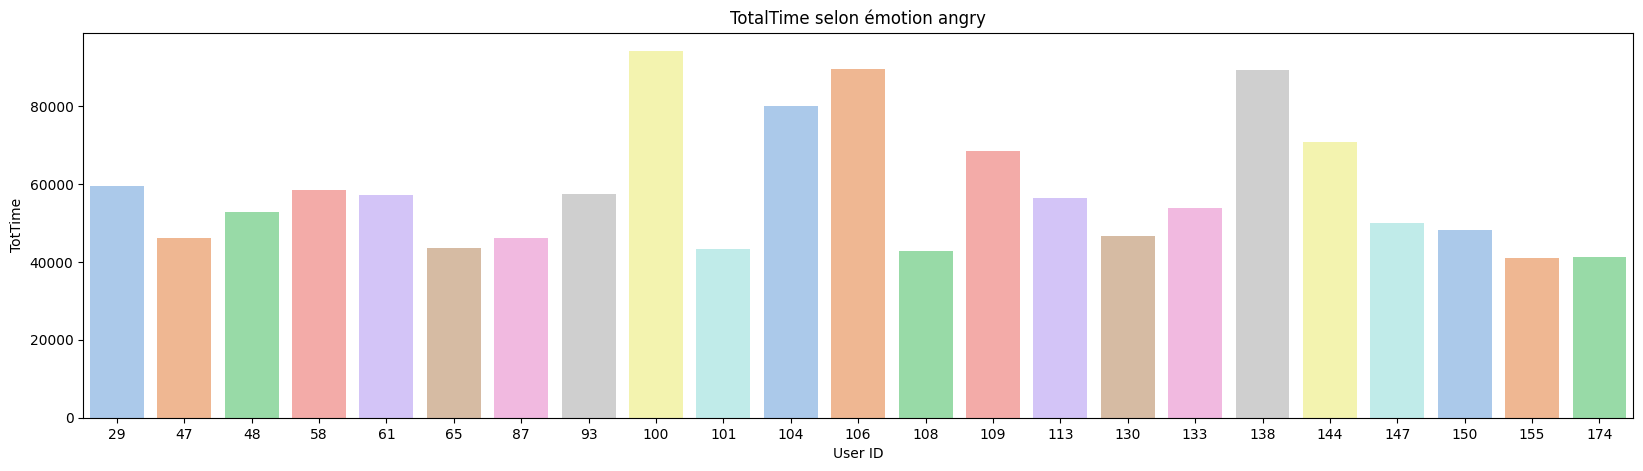

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))
sns.barplot(data=A,x='User ID', y='TotTime',palette='pastel',legend=False)
plt.title("TotalTime selon émotion angry")
plt.show()

<ipython-input-115-c4cab4fcffb7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=S,x='User ID', y='TotTime',palette='pastel',legend=False)


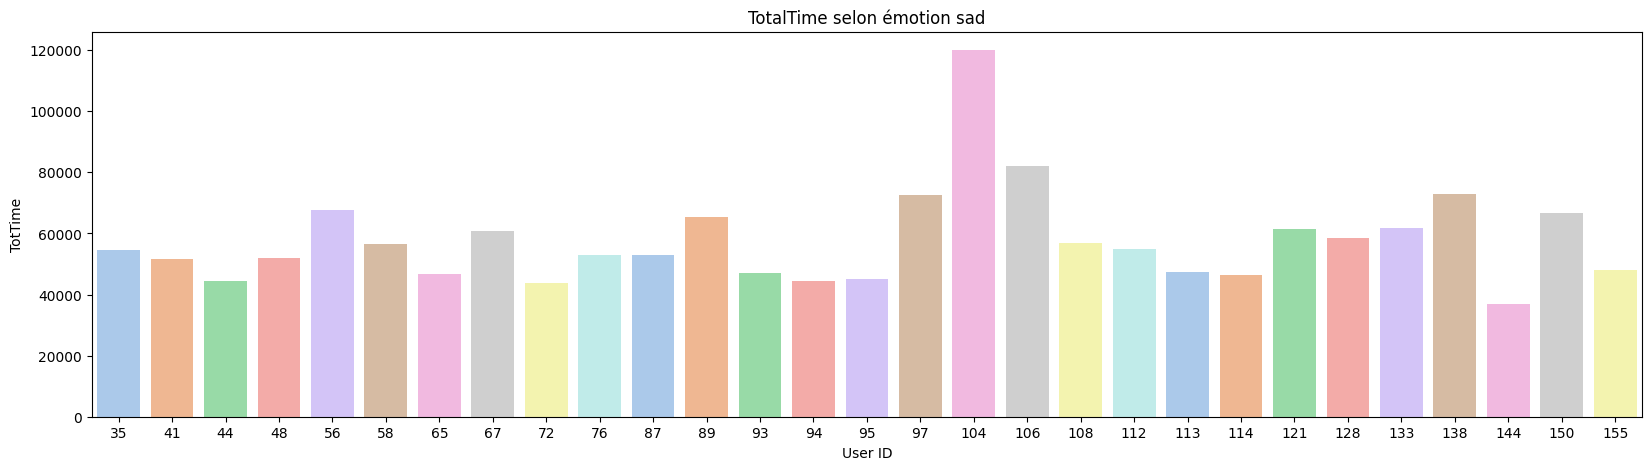

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))
sns.barplot(data=S,x='User ID', y='TotTime',palette='pastel',legend=False)
plt.title("TotalTime selon émotion sad")
plt.show()

In [ ]:
data_user[data_user['userId']==100]

userId typeWith    typistType                       pcTimeAverage  \
0      100  2 hands  Touch Typist           More than 3 hours per day   
57     100  2 hands  Touch Typist  between 1 hour and 3 hours per day   
87     100  2 hands  Touch Typist           More than 3 hours per day   

   ageRange  gender   status              degree  country  
0     16-19  Female  Student  College/University  Tunisia  
57    20-29    Male  Student  College/University  Tunisia  
87    20-29  Female  Student  College/University  Tunisia

In [ ]:
data_user[data_user['userId']==93]

userId typeWith    typistType              pcTimeAverage ageRange  \
85       93  2 hands  Touch Typist  less than an hour per day    20-29   
96       93  2 hands  Touch Typist  More than 3 hours per day    20-29   
99       93  2 hands  Touch Typist  More than 3 hours per day    20-29   
103      93  2 hands  Touch Typist  More than 3 hours per day    20-29   

     gender        status              degree  country  
85   Female       Student  College/University  Tunisia  
96   Female  Professional  College/University   France  
99   Female  Professional  College/University  Tunisia  
103  Female       Student  College/University  Tunisia

In [ ]:
data_user['userId'].value_counts()

userId
93     4
130    3
131    3
122    3
100    3
      ..
161    1
29     1
47     1
86     1
41     1
Name: count, Length: 85, dtype: int64

In [ ]:
import pandas as pd
user=data_user.copy()
user =user.rename(columns={'userId':'userid'})
merged_df = pd.merge(data_freq,user, on='userid', how='inner')

In [ ]:
merged_df

userid textIndex emotionIndex  delFreq  leftFreq   TotTime typeWith  \
0       100        FI            N        8         1  192762.0  2 hands   
1       100        FI            N        8         1  192762.0  2 hands   
2       100        FI            N        8         1  192762.0  2 hands   
3       100        FR            N      145         0       NaN  2 hands   
4       100        FR            N      145         0       NaN  2 hands   
..      ...       ...          ...      ...       ...       ...      ...   
843      72        FR            N        4         0       NaN  2 hands   
844     113        FI            N        9         0   37576.0  2 hands   
845     113        FI            N        9         0   37576.0  2 hands   
846     113        FR            N        6         0       NaN  2 hands   
847     113        FR            N        6         0       NaN  2 hands   

            typistType                       pcTimeAverage ageRange  gender  \
0         Touch Typist           More than 3 hours per day    16-19  Female   
1         Touch Typist  between 1 hour and 3 hours per day    20-29    Male   
2         Touch Typist           More than 3 hours per day    20-29  Female   
3         Touch Typist           More than 3 hours per day    16-19  Female   
4         Touch Typist  between 1 hour and 3 hours per day    20-29    Male   
..                 ...                                 ...      ...     ...   
843       Touch Typist           More than 3 hours per day    20-29  Female   
844  Two Finger Typist           less than an hour per day    20-29  Female   
845       Touch Typist           More than 3 hours per day    30-39    Male   
846  Two Finger Typist           less than an hour per day    20-29  Female   
847       Touch Typist           More than 3 hours per day    30-39    Male   

           status              degree   country  
0         Student  College/University   Tunisia  
1         Student  College/University   Tunisia  
2         Student  College/University   Tunisia  
3         Student  College/University   Tunisia  
4         Student  College/University   Tunisia  
..            ...                 ...       ...  
843  Professional  College/University    France  
844       Student  College/University   Tunisia  
845  Professional  College/University  Portugal  
846       Student  College/University   Tunisia  
847  Professional  College/University  Portugal  

[848 rows x 14 columns]

In [ ]:
country= merged_df.groupby(['emotionIndex','country'])['TotTime'].sum().reset_index()

In [ ]:
country.sort_values(by='TotTime',ascending=False)

emotionIndex               country     TotTime
38            N               Tunisia  17610498.0
32            N                France   2888594.0
15            C               Tunisia   2769979.0
24            H               Tunisia   2545790.0
51            S               Tunisia   2255867.0
8             A               Tunisia   1909491.0
27            N               Bahamas   1012702.0
33            N               Germany    659812.0
21            H                France    463721.0
12            C                France    353920.0
4             A                France    342999.0
34            N                 Italy    335173.0
47            S                France    295152.0
29            N              Belgique    257690.0
25            N                Angola    249807.0
43            S               Bahamas    240048.0
37            N                Suisse    197632.0
13            C               Germany    194065.0
9             C                Angola    194065.0
30            N                Belize    192877.0
36            N                 Spain    161615.0
28            N               Barbade    142793.0
22            H               Germany    135654.0
35            N              Portugal    121841.0
26            N       Arabie_Saoudite    117206.0
45            S              Belgique    115627.0
31            N                Canada    114615.0
48            S               Germany    107764.0
40            N         United_States    103842.0
7             A                 Spain    103373.0
10            C               Bahamas     82813.0
2             A               Bahamas     80107.0
14            C              Portugal     78186.0
3             A                Canada     68558.0
39            N  United Arab Emirates     63011.0
49            S                 Italy     58424.0
6             A              Portugal     56462.0
52            S  United Arab Emirates     53020.0
41            S                Angola     52942.0
23            H              Portugal     48354.0
42            S       Arabie_Saoudite     48059.0
50            S              Portugal     47297.0
0             A                Angola     46153.0
5             A               Germany     46153.0
44            S               Barbade     44272.0
46            S                Belize     43731.0
11            C               Barbade     43685.0
17            H               Bahamas     42345.0
1             A       Arabie_Saoudite     41039.0
18            H               Barbade     39048.0
16            H                Angola     31031.0
19            H              Belgique     27284.0
20            H                Canada     19565.0

In [ ]:
country['emotionIndex'].value_counts()

emotionIndex
N    16
S    12
A     9
H     9
C     7
Name: count, dtype: int64

In [ ]:
country['country'].value_counts()

country
Angola                  5
Bahamas                 5
Germany                 5
France                  5
Portugal                5
Tunisia                 5
Barbade                 4
Arabie_Saoudite         3
Belgique                3
Canada                  3
Spain                   2
Belize                  2
Italy                   2
United Arab Emirates    2
Suisse                  1
United_States           1
Name: count, dtype: int64

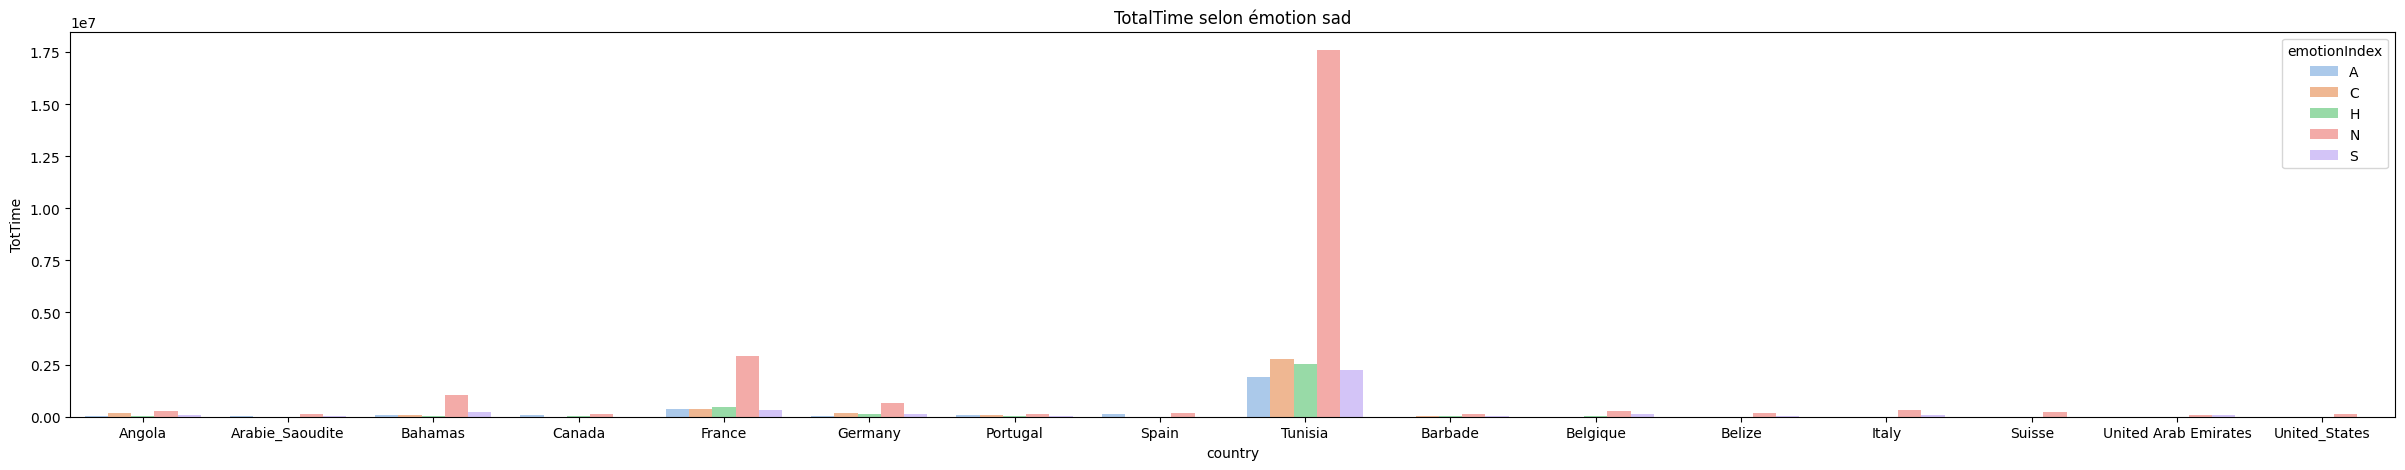

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 5))
sns.barplot(data=country,x='country', y='TotTime',hue='emotionIndex',palette='pastel')

plt.title("TotalTime selon émotion sad")
plt.show()